## Using networkx

For this network you should execute the first cell before going on to explore the
others.  Uncomment out `%matplotlib inline` if you want all your graphs to appear in the notebook and not in a separate window.  If you choose to have them in a separate window, be aware that if didn't start the notebook with the `--pylab` flag, you will have to execute `plt.show()` to get the graphs to appear on your screen, even after having given a `draw` command.

Some of the graph used in this notebook or usable using the code in this notebook include: [homer.gml, ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/homer.gml)
[anna.gml, ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/anna.gml)
[lesmiserables.gml, ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/lesmiserables.gml)
[polblogs.gml, ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/polblogs.gml) 
[an anonymized ego network, ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/personal_ego_network_anon.gml) 
[dolphins-newman-2003.gml, ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/dolphins-newman-2003.gml) and
[FauxMesaHigh.gml. ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/FauxMesaHigh.gml)



All of these graphs can be loaded into Python using the `url_fetch_network_graph` function defined in this notebook together with the urls linked to in the previous paragraph (look at the raw markup by double-clicking on this cell).

```
url22 = 'http://gawron.sdsu.edu/python_for_ss/course_core/assignments/homer.gml'
hg = url_fetch_networkx_graph (url22)
```

After executing this code `hg` is a networkx graph instance showing the connectedness of the characters in Homer (connected means occurring in the same scene).  For those interested in network projects, have a look at [Mark Newman's networks page](http://www-personal.umich.edu/~mejn/netdata/) for mre examples.

The "Homer" graph consists of characters from *The Iliad*.  The "Anna" graph maps the characters from *Anna Karenina* (discussion below), and "Les Miserables" maps characters from the Victor Hugo novel *Les Miserables*.  For background on the polblogs (political blogs) data, see 
[Adamic and Glance (2005). ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/AdamicGlanceBlogWWW.pdf) 
For background on the dolphin graph, see 
[Lusseau and Newman (2004). ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/lusseau_newman_identifying_role_animals_play_04.pdf) For more on the Faux Mesa High School graph, see
[Goodreau's Faux Mesa High School dataset description. ](http://www.casos.cs.cmu.edu/tools/computational_tools/datasets/external/Goodreau/index11.php)

In [2]:
#%matplotlib inline
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

In [56]:
nx.__version__

'2.8.4'

If you want to have your graphs appear in the matplotlib graph GUI,
then comment
out the matplotlib inline command above and start ipython notebook
up with the pylab flag. 

```
jupyter --pylab inline notebook
```

If you do that, 
then they won't appear inline as they do in the distributed version
of the notebook.  If you have a Mac, then in the latest version
of matplotlib, you also need to uncomment out the code in the following cell and execute it.  Non Mac users should leave this commented out.

Let's read in the karate network from

> Zachary, W. W. 1977. "An information flow model for conflict and fission in small groups." Journal of anthropological research, 452-473.

We'll draw it with a  circular layout, and save the results in the image file
*networkx_circular_karate.png*.  We'll be reading in the builtin networkx version of the karate graph, rather than the one distributed in the gml file above.  The only difference is that the networkx version has node attributes identifying what faction each 
member belongs to.  That will be important in drawing an informative graph.

In [52]:
kn = nx.karate_club_graph()

`kn` is a `networkx` graph.

In [58]:
kn

A `networkx Graph` is a container.  It has a length and supports the `in` test.

In [59]:
len(kn)

34

In [60]:
3 in kn

True

The `True` here reflects the fact that there is a node in `kn` whose name is 3.

`kn` can be also **iterated** through like any container (all containers
are iterables). So we can print the 34 members of the karate club as follows:

In [61]:
for n in kn:
    print(n)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


Let's draw the graph to get a birdseye view of the data.

For drawing, we'll try a force spring layout algorithm.

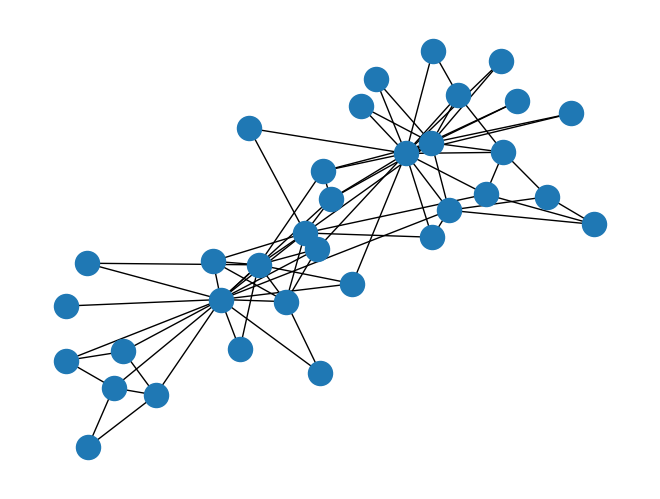

In [62]:
# Draw choosing  a force-spring algorithm
nx.draw_spring(kn)
# Use the default drawing program.
#nx.draw_networkx(kn)
# Saving the figure to a file (works only after drawing it)
#plt.savefig('networkx_spring_karate.png')

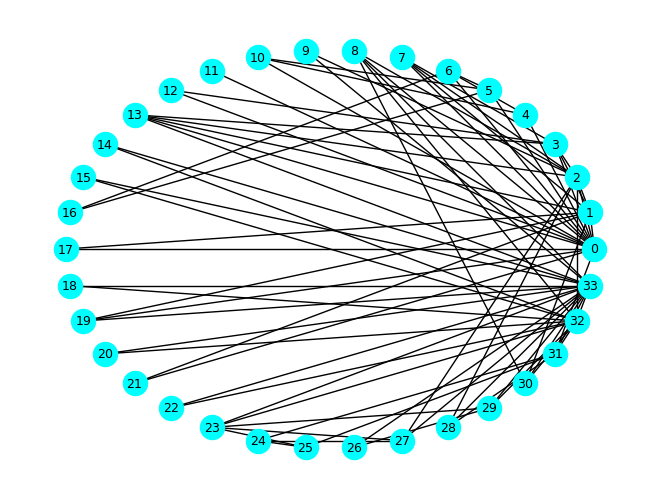

In [63]:
# Different layout algorithm, and we'll throw a new node color and labels in too.
nx.draw_circular(kn,with_labels=True,font_size=9, node_color='cyan')
#plt.savefig('networkx_circular_karate.png')

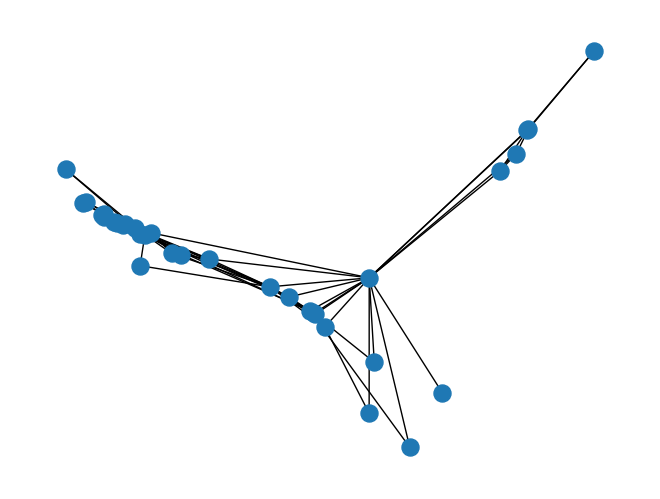

In [64]:
# This layout suffers from node overlap, making labels unfeasible 
# Shrinking node circles to help
nx.draw_spectral(kn,node_size=150)
#plt.savefig('networkx_spectral_karate.png')

#### Graphs as Dictionaries

Graphs in `networkx` are **dictionary-like**.

By this I mean that we can treat the graph `kn` as a dictionary whose keys are the nodes of `kn`;

In [7]:
kn[0]

AtlasView({1: {'weight': 4}, 2: {'weight': 5}, 3: {'weight': 3}, 4: {'weight': 3}, 5: {'weight': 3}, 6: {'weight': 3}, 7: {'weight': 2}, 8: {'weight': 2}, 10: {'weight': 2}, 11: {'weight': 3}, 12: {'weight': 1}, 13: {'weight': 3}, 17: {'weight': 2}, 19: {'weight': 2}, 21: {'weight': 2}, 31: {'weight': 2}})

returns another dictionary-like object, which we'll just call a dictionary for now,
since it has keys and values like a dictionary, and values can be looked up using the 
get-item-syntax Python uses for dictionaries.

The keys of the *dictionary* `kn[0]` are the neighbors of node `0`.  So
the fact that `kn[0]` has 1 as one of its keys means that
there is an edge between 0 and 1 in the graph.

You'll notice that the values of the `kn[0]` dictionary are themselves dictionaries. For example,

`kn[0][1]`

is the **attribute dictionary** for the edge (0,1).

In [8]:
kn[0][1]

{'weight': 4}

Note that all 
the edges have a **weight attribute**.  These weights are taken from Zachary's paper and 
quantify the intensity of the relationship, 
measured by frequency with which the two club members see each other outside club
activities, based on Zachary's interviews.  So above we see that member 0's relationship with member 2 is
more intense than any of 1's other relationships with club members.

We look that up as follows

In [65]:
kn[0][2]['weight']

5

Now this is an undirected graph, so of course it has to be the case that:

In [10]:
kn[2][0]['weight']

5

This is not a reflection on whether friendship intensity has to be the same in both directions.

Rather, it's down to the fact that we are representing the karate club
as undirected graph, and in an undirected graph the edge from 0 to 2 is the same edge
as the edge from 2 to 0.  Therefore the the edge attributes must be represented by
one and the same dictionary:

In [11]:
kn[0][2] is kn[2][0]

True

Notice I didn't use `==` here.  I'm interested in whether the two expressions
`kn[0][2]` and `kn[2][0]` denote the same object in memory (the meaning of `is`)
And they do. If I were interested in whether
they contain the same information, I would use `==`. 

When you reflect on how Zachary measures intensity (frequency of interaction), it seems correct 
that the intensity must be the same for the pair (0,2) and the pair (2,0), and
that supports the decision to treat the club as an undirected graph.

Now suppose we wanted to color edges and that we want to assign the color red to the edge from 0 to 1.  Then we could add another attribute 
to the following edge attribute dictionary:

In [12]:
kn[0][1]

{'weight': 4}

In [66]:
kn[0][1]['color'] = 'red'

And  when we look at it now

In [67]:
kn[0][1]

{'weight': 4, 'color': 'red'}

In [68]:
kn[1][0]

{'weight': 4, 'color': 'red'}

In [ ]:
kn.b

In [38]:
kn.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

Similar pattern for nodes:

In [39]:
kn.nodes[0]

{'club': 'Mr. Hi'}

In [40]:
kn.nodes[33]

{'club': 'Officer'}

In [53]:
edge_dict = {(n1,n2):'white' if kn.nodes[n1]['club'] == kn.nodes[n2]['club'] else 'black' for (n1, n2) in kn.edges()}
    

In [54]:
edge_dict[(0,1)]

'white'

In [55]:
edge_dict[(8,33)]

'black'

In [56]:
kn[8][33]

{'weight': 4}

In [57]:
nx.set_edge_attributes(kn,edge_dict,name="color")

In [58]:
kn[8][33]

{'weight': 4, 'color': 'black'}

In [59]:
kn[0][1]

{'weight': 4, 'color': 'white'}

#### Customizing the drawing to show our new edge color

Adding some customization to the drawing (using our edge colors, and illustrating some other stuff).

This requires doing the drawing in stages: compute layout, draw nodes, draw labels,
draw edges.  And of course the last three steps all depend on the layout,
which must be done first.

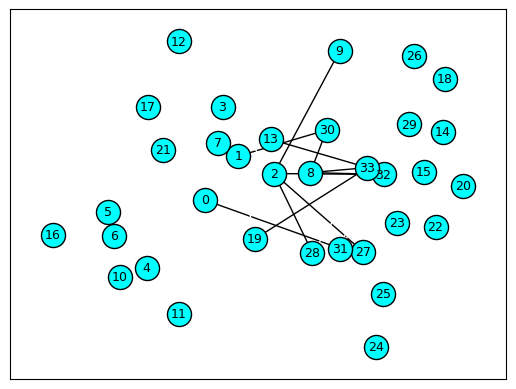

In [50]:
default_edge_color='aqua'
# To understand the next lines better, do
# print(kn.edges.__doc__)
# This is a way to collect values for a SINGLE edge attribute (the kn graph has 2: weight and color)
# providing a default, and using the same ordering stored in kn.edges()
EVcol_data = kn.edges(data="color", default=default_edge_color)
edge_colors= [col for (i,j,col) in EVcol_data]

#  This returns a layout object we can reuse in future commands/drawings.
#  Fixing seed allows us to reproduce a particular layout in future runs.
seed = 47
pos=nx.spring_layout(kn,seed=seed)
ncoll = nx.draw_networkx_nodes(kn, pos, node_color='cyan')
#Add Node outlines.  No keyword arg for this.  Whine to networkx folks
ncoll.set_edgecolor('k')

# Labels must be a dict(): node_id -> label
labels= {i:i for  i in range(len(kn))}
nx.draw_networkx_labels(kn, pos, labels=labels,font_size=9)
nx.draw_networkx_edges(kn, pos, edge_color=edge_colors)

# The above is approximated with the following, 
# which necessarily allows fewer customizations (viz. layout pr node outlines)
# nx.draw_spring(kn,labels=labels,edge_color=edge_colors,node_color='cyan',font_size=9)

A `networkx` graph has a second dictionary storing node attributes, and in this
case there is a node attribute that was defined when we loaded the graph.

## Node data

As we said above, the reason for loading up the networkx definition of the karate club graph was that it contained information about the faction of each node, information taken from Zachary's original paper.  This is stored as a **node attribute**.  Most interesting network applications will involve doing some computing with node attributes.  In `networkx`, node attributes are stored in a dictionary which is an attrribute of the graph:

In [38]:
kn.nodes[0]

{'club': 'Mr. Hi'}

Nodes can attributes too, which is fortunate because many different kinds of network analysis, esepcially dynamic network analysis, will depend on attributes we have associated with each node.  The attributes of a node are stored
in the graphs `node` dictionary.

In [70]:
kn.nodes[27]

{'club': 'Officer'}

Distinct from `node`, there is a `nodes` attribute that is a listlike container 
for all the nodes.

In [10]:
kn.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

This `NodeView` is a sequence, and can be indexed like a list:

In [40]:
kn.nodes[3]

{'club': 'Mr. Hi'}

It can be iterated through like any container.

In [72]:
{kn.nodes[n]['club'] for n in kn}

{'Mr. Hi', 'Officer'}

In [41]:
#[kn.nodes[n]['club'] for n in kn.nodes()]
[kn.nodes[n]['club'] for n in kn]

['Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Officer',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Officer',
 'Officer',
 'Mr. Hi',
 'Mr. Hi',
 'Officer',
 'Mr. Hi',
 'Officer',
 'Mr. Hi',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer']

**Write code that constructs the set of of clubs without constructing the club list for all the members.**

In [42]:
{kn.nodes[n]['club'] for n in kn}

{'Mr. Hi', 'Officer'}

In [7]:
{kn.nodes[n]['club'] for n in kn.nodes}

{'Mr. Hi', 'Officer'}

What you can do with nodes often has an analogue with edges, and vice versa.  So
there is an `edges` attribute that produce a similar list like container for edges,
providing an easy way to iterate throught the edges of a graph.

In [15]:
kn.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

## Degree Centrality

Now let's compute some influence information about the karate graph.  We'll use **degree centrality**.

In [5]:
# The proportion of all the nodes that each node is connected to.
D = nx.degree_centrality(kn)

The degree centrality measure for a node `n` is the number of neighbors they have divided by the maximum number of neighbors they could have (`len(kn) -1`).

Verify this by looking at edge info.

In [20]:
list(kn.neighbors(0))

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

In [43]:
max_nbrs = len(kn) - 1
print(max_nbrs)
#nbrs0 = [e for (s,e) in kn.edges() if s == 0]
nbrs0 = list(kn.neighbors(0))
print(len(nbrs0))
print(len(nbrs0)/max_nbrs)

33
16
0.48484848484848486


In [22]:
D[0]

0.48484848484848486

`D` is just a dictionary assigning a centrality score to each node.  This is great but often we're interested in the **ranking** of nodes by centrality scores.  We need a data structure capable of representing order, so we turn the dictionary into a list of pairs with the `items` method.  

In [17]:
list(D.items())[:5]

[(0, 0.48484848484848486),
 (1, 0.2727272727272727),
 (2, 0.30303030303030304),
 (3, 0.18181818181818182),
 (4, 0.09090909090909091)]

Next we sort that list, paying attention only to the second member of each pair (the centrality score), reversing the the ranking so that the most central node comes **first**.  Then we look.

The `.sort()` method has a parameter `key` that takes a function that will be applied to every element of the list and produce "key", a value to sort it by.  That value needs to be something Python already knows how to sort like a number or string.  We want to sort our list of `(node, score)`  pairs by their scores, so want a function
that returns the second element of a tuple.  We could write one and name it `second` or something like that and that would **work**.  But Python has a convenient shorthand for creating one-off anonymous functions.  It is the `lambda` operator.  

`lambda` needs one or more parameters and a colon, folllowed by an expression whose value is returned. It works as in the following example:

In [75]:
# Both sets of parens are needed.  The first set lets the Python parser know where the 
# function definition ends (no code block allowed here)  The second set is the parens that any function
# needs around its arguments.
(lambda x: x + 1)(3)

4

In [76]:
# Or you could do
f = lambda x: x + 1
f(3)

4

In [77]:
# Or return the 4th member of a sequence
(lambda x:x[3])([0,1,2,3])

3

For our application:

In [29]:
# Apply this lambda-function to a pair to get its second member.
# The double parens are needed or the line will be interpreted
# as applying the function to two arguments
(lambda x:x[1])((33, 0.5151515151515151))

0.5151515151515151

Now we sort.

In [22]:
D_il = list(D.items())
D_il.sort(key=lambda x:x[1],reverse=True)
#D_il.sort()
D_il

[(33, 0.5151515151515151),
 (0, 0.48484848484848486),
 (32, 0.36363636363636365),
 (2, 0.30303030303030304),
 (1, 0.2727272727272727),
 (3, 0.18181818181818182),
 (31, 0.18181818181818182),
 (8, 0.15151515151515152),
 (13, 0.15151515151515152),
 (23, 0.15151515151515152),
 (5, 0.12121212121212122),
 (6, 0.12121212121212122),
 (7, 0.12121212121212122),
 (27, 0.12121212121212122),
 (29, 0.12121212121212122),
 (30, 0.12121212121212122),
 (4, 0.09090909090909091),
 (10, 0.09090909090909091),
 (19, 0.09090909090909091),
 (24, 0.09090909090909091),
 (25, 0.09090909090909091),
 (28, 0.09090909090909091),
 (9, 0.06060606060606061),
 (12, 0.06060606060606061),
 (14, 0.06060606060606061),
 (15, 0.06060606060606061),
 (16, 0.06060606060606061),
 (17, 0.06060606060606061),
 (18, 0.06060606060606061),
 (20, 0.06060606060606061),
 (21, 0.06060606060606061),
 (22, 0.06060606060606061),
 (26, 0.06060606060606061),
 (11, 0.030303030303030304)]

## Betweenness centrality and the Girvan-Newman algorithm

Same code pattern, different kind of centrality, yielding different but similar results.
This time we will use **betweenness centrality**.
For a discussion of betweenness centrality, see the online textbook.

In [23]:
B = nx.betweenness_centrality(kn)
B_il = list(B.items())
B_il.sort(key=lambda x:x[1],reverse=True)
B_il

[(0, 0.43763528138528146),
 (33, 0.30407497594997596),
 (32, 0.145247113997114),
 (2, 0.14365680615680618),
 (31, 0.13827561327561325),
 (8, 0.05592682780182781),
 (1, 0.053936688311688304),
 (13, 0.04586339586339586),
 (19, 0.03247504810004811),
 (5, 0.02998737373737374),
 (6, 0.029987373737373736),
 (27, 0.02233345358345358),
 (23, 0.017613636363636363),
 (30, 0.014411976911976909),
 (3, 0.011909271284271283),
 (25, 0.0038404882154882154),
 (29, 0.0029220779220779218),
 (24, 0.0022095959595959595),
 (28, 0.0017947330447330447),
 (9, 0.0008477633477633478),
 (4, 0.0006313131313131313),
 (10, 0.0006313131313131313),
 (7, 0.0),
 (11, 0.0),
 (12, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (26, 0.0)]

Now let's do `betweenness centrality` again for a different kind of object, edges instead of nodes.  It's edge centrality that is used in the Girvan Newman algorithm discussed in the online book.

In [78]:
eb = nx.edge_betweenness_centrality(kn)

In [79]:
eb_il = list(eb.items())

sorted(eb_il,key=lambda x: x[1], reverse=True)

[((0, 31), 0.1272599949070537),
 ((0, 6), 0.07813428401663695),
 ((0, 5), 0.07813428401663694),
 ((0, 2), 0.0777876807288572),
 ((0, 8), 0.07423959482783014),
 ((2, 32), 0.06898678663384543),
 ((13, 33), 0.06782389723566191),
 ((19, 33), 0.05938233879410351),
 ((0, 11), 0.058823529411764705),
 ((26, 33), 0.0542908072319837),
 ((31, 33), 0.05339388280564752),
 ((0, 4), 0.0522875816993464),
 ((0, 10), 0.0522875816993464),
 ((0, 12), 0.04652406417112298),
 ((0, 19), 0.045936960642843),
 ((0, 13), 0.04237189825425121),
 ((25, 31), 0.04205783323430383),
 ((31, 32), 0.04143394731630026),
 ((2, 27), 0.04119203236850296),
 ((8, 33), 0.04043657867187279),
 ((0, 17), 0.04012392835922248),
 ((0, 21), 0.040123928359222474),
 ((24, 31), 0.040106951871657755),
 ((14, 33), 0.03473955238661121),
 ((15, 33), 0.03473955238661121),
 ((18, 33), 0.03473955238661121),
 ((20, 33), 0.03473955238661121),
 ((22, 33), 0.03473955238661121),
 ((23, 33), 0.03266983561101209),
 ((1, 30), 0.032280791104320514),
 ((2,

Here's the Python code implementing the heart of Girvan-Newman.

In [26]:
## Simulating a step in Girvan-Newman method.  Remove the highest betweenness edge. Recalculate
## edge betweenness.
#kn.remove_edge(1,32)
eb2 = nx.edge_betweenness_centrality(kn)
eb_il2 = list(eb2.items())
(start,end) = sorted(eb_il2,key=lambda x: x[1], reverse=True)[0][0]
kn.remove_edge(start,end)
components = list(nx.connected_components(kn))
print(len(list(components)))
components

1


[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33}]

If we had split the network into more than one piece this list would have a length greater than 1.

In [30]:
components = nx.connected_components(kn)
len(list(components))

1

In [28]:
len(kn)

34

So we didnt succeed in splitting the graph in two by snipping this edge.  This means we try again if we're
doing the full algorithm, recomputing all the betweenness centrality numbers, finding the new best-scoring edge, 
and snipping that.  But we leave that part an an exercise.

## Customized drawing

Almost all complex graphs will benefit from some kind of customization when drawing them.  For example, the layout algorith does not take labeling into account, so that adding labels to a graph may result in a cluttered, even unreadable, graph.  You can deal with this by leaving some nodes out, or by leaving some edges out, adjusting label size and position, or by factoring some of the information into coloring.  In all cases you need to break the drawing process up into component steps, which allows you to customize some or all of them.  The following code illustrates some of the ideas.

There are basically four steps:
  1.  Compute the basic layout.  This creates a layout object we'll call `pos`,  used in the next steps
  2.  Draw the node labels  for `pos`(optional)
  3.  Draw the nodes for `pos`, possibly with coloring, and possibly with special outlining
  4.  Draw the edges for `pos`, connecting the nodes.
These correspond to the following functions:

  ```python
  nx.spring_layout
  nx.draw_networkx_labels
  nx.draw_networkx_nodes
  nx.draw_networkx edges
  ```

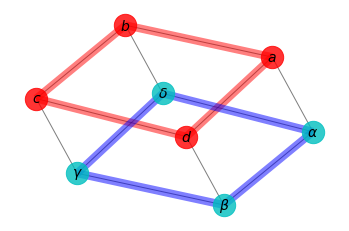

In [32]:
import matplotlib.pyplot as plt
    
import networkx as nx

G=nx.cubical_graph() 
pos=nx.spring_layout(G) # positions for all nodes

# Try some other layout algorithms!
# graphviz variants will only work if you have graphviz installed 
# via link given above.
#pos = nx.circular_layout(G)
#pos = nx.graphviz_layout(G,prog='twopi')
#pos = nx.graphviz_layout(G,prog='sfdp')
#pos = nx.graphviz_layout(G,prog='neato')

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=[0,1,2,3],
                       node_color='r',
                       node_size=500,
		       alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=[4,5,6,7],
                       node_color='c',
                       node_size=500,
		       alpha=0.8)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       edgelist=[(0,1),(1,2),(2,3),(3,0)],
                       width=8,alpha=0.5,edge_color='r')
nx.draw_networkx_edges(G,pos,
                       edgelist=[(4,5),(5,6),(6,7),(7,4)],
                       width=8,alpha=0.5,edge_color='b')


# some math labels
labels={}
labels[0]=r'$a$'
labels[1]=r'$b$'
labels[2]=r'$c$'
labels[3]=r'$d$'
labels[4]=r'$\alpha$'
labels[5]=r'$\beta$'
labels[6]=r'$\gamma$'
labels[7]=r'$\delta$'
nx.draw_networkx_labels(G,pos,labels,font_size=14)

plt.axis('off')
plt.savefig("labels_and_colors.png") # save as png
plt.show() # display

## Customized drawing example

The next cell shows various ways of customizing the karate graph. 
  
In particular, the steps shown are those needed to produce the colored FG layout figure in the lecture notes. Some of the commented out lines show experiments you could try.

In [ ]:
list(zip(clubs, club_colors))

In [34]:
print(nx.draw_networkx_labels.__doc__)

Draw node labels on the graph G.

    Parameters
    ----------
    G : graph
        A networkx graph

    pos : dictionary
        A dictionary with nodes as keys and positions as values.
        Positions should be sequences of length 2.

    labels : dictionary (default={n: n for n in G})
        Node labels in a dictionary of text labels keyed by node.
        Node-keys in labels should appear as keys in `pos`.
        If needed use: `{n:lab for n,lab in labels.items() if n in pos}`

    font_size : int (default=12)
        Font size for text labels

    font_color : string (default='k' black)
        Font color string

    font_weight : string (default='normal')
        Font weight

    font_family : string (default='sans-serif')
        Font family

    alpha : float or None (default=None)
        The text transparency

    bbox : Matplotlib bbox, (default is Matplotlib's ax.text default)
        Specify text box properties (e.g. shape, color etc.) for node labels.

    horizont

In [47]:
nx.get_node_attributes(kn,"club")

{0: 'Mr. Hi',
 1: 'Mr. Hi',
 2: 'Mr. Hi',
 3: 'Mr. Hi',
 4: 'Mr. Hi',
 5: 'Mr. Hi',
 6: 'Mr. Hi',
 7: 'Mr. Hi',
 8: 'Mr. Hi',
 9: 'Officer',
 10: 'Mr. Hi',
 11: 'Mr. Hi',
 12: 'Mr. Hi',
 13: 'Mr. Hi',
 14: 'Officer',
 15: 'Officer',
 16: 'Mr. Hi',
 17: 'Mr. Hi',
 18: 'Officer',
 19: 'Mr. Hi',
 20: 'Officer',
 21: 'Mr. Hi',
 22: 'Officer',
 23: 'Officer',
 24: 'Officer',
 25: 'Officer',
 26: 'Officer',
 27: 'Officer',
 28: 'Officer',
 29: 'Officer',
 30: 'Officer',
 31: 'Officer',
 32: 'Officer',
 33: 'Officer'}

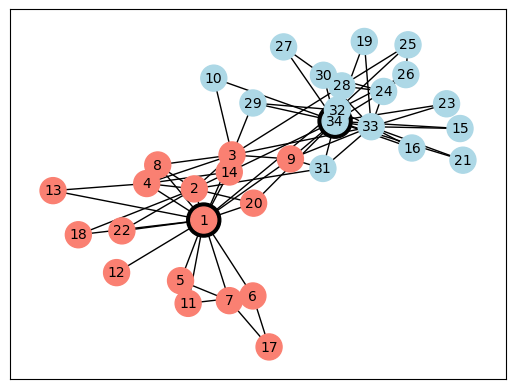

In [54]:
import math

kn = nx.karate_club_graph()

# Keep both communities the same color for pictures not coloring the communities.
#club_colors = ('red','red') 
#Some alternative color schemes
#club_colors = ('lightgray','salmon')
club_colors = ('lightblue','salmon')
#club_colors = ('lightblue','lightgreen')
#club_colors = ('#00CCFF','#FF0033')
clubs = ('Officer', 'Mr. Hi')
# A dictionary that maps from a club to the club color.
color_dict = dict(list(zip(clubs, club_colors)))
# node_dict[n]['club'] is the club for node n.
node_dict = kn.nodes 

# Now using Zachary's data, make a list of colors to be used to color 
# each node based on the faction of that node (according to Zachary)

# Dict will order keys in kn.nodes() order
clubs = nx.get_node_attributes(kn,"club")
#node_color = [color_dict[clubs[n]] for n in kn.nodes()]
node_color = [color_dict[clubs[n]] for n in clubs]

# Draw the network with no labels, itsy-bitsy nodes
#pos = nx.spring_layout(kn,scale=1.0)
pos = nx.spring_layout(kn)
#nx.draw_networkx(kn,pos, with_labels=False,
#                 node_size=25,node_color="lightgray")  #Default node size=300

#default_distance_between_nodes = 1.0/math.sqrt(len(kn.nodes()))
#pos = nx.spring_layout(kn,scale=1.0,k=2*default_distance_between_nodes)
#pos = nx.spring_layout(kn,scale=2.0)

#Now put in the labels, using a label->new_label mapping. We'll change the labels to agree with
# Zachary's original indexing, so x->x+1
new_labels = dict((x,x + 1) for x in kn.nodes())
font_size = 10
## ha/va not working
nx.draw_networkx_labels(kn,pos,new_labels,
                        font_size=font_size,
                        font_color='black',
                        verticalalignment='center',
                        horizontalalignment = 'center')
# Highlight the two leader nodes, by drawing slightly larger black circles round them.
nx.draw_networkx_nodes(kn,pos,{0:0,33:33},
                       node_color=['black','black'],node_size=600)
# Now draw all the nodes, including leaders, using faction color scheme.
nx.draw_networkx_nodes(kn,pos,new_labels,
                      node_color=node_color,node_size=350)
# Put in the edges
nx.draw_networkx_edges(kn,pos)
plt.show()

## Watts-Strogatz graphs

In [80]:
import networkx as nx
#watts_strogatz_graph(n,k,p,seed)
# k=Number of neighbors each node connects to initially
# p= probability of reconnection. p=0 an ordered graph, p=1 random.
(n,k,p) = (15,4,.15)
g_ran = nx.watts_strogatz_graph(n,k, 1.0, 5)
g_ws = nx.watts_strogatz_graph(n,k, p, 5)
g_ordered = nx.watts_strogatz_graph(15,k, 0, 5)
#g_ordered = nx.newman_watts_strogatz_graph(n,k, 0.0, 5)
#g_ordered = nx.havel_hakimi_graph([4]*25)
nx.draw_circular(g_ws)

In [40]:
nx.draw_circular(g_ran)

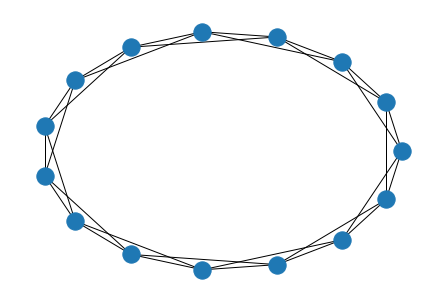

In [41]:
#g_ordered = nx.watts_strogatz_graph(15,k, 0, 5)
# Need graohviz installed for the following to work
#pos=nx.graphviz_layout(g_ordered,prog='circo')
#nx.draw_networkx(g_ordered,pos=pos)
nx.draw_circular(g_ordered)

## Clustering coefficient of a Graph

**Clustering Coefficient of a node** (CC): The clustering coefficient of a node is the ratio of the number of links connecting a node’s neighbors to each other to the maximum possible number of such links. The clustering coefficient of a graph is the average clustering coefficient of all the nodes in the graph. In a densely connected graph, clustering is quite high; the neighbors a node n is connected to are quite likely to be connected to other nodes n is connected to. In a random graph, the clustering coefficient is dramatically reduced, because those predictable links have all been destroyed.

**Clustering Coefficient of a Graph**:  The average of the clustering coefficient for all the nodes.

The idea being explored here is important in characterizing social networks.  

What is being measured can be thought of as a probability.  Let's start with Alice, someone from a social network.  Given that Alice knows two other people Betty and Carol, what is the probability that that Betty and Carol know each other?  Is it higher or lower than -- or the same as -- the probability that two randomly chosen people -- Dorothy and Edna -- know each other?  In a social network the answer is intuitively obvious.  It's more likely that Alice's friends  Betty and Carol know each than it is that Dorothy and Edna know each other.  The fact that Betty and Carol
have both met Alice increases the probability that will meet each other.  Writing it out:

$$
\text{P}\,(\,\text{neighbors}\,(\text{B},\,\text{C})\mid 
    \lbrack\,\text{neighbors}\,(\text{A},\,\text{B}\, \&\, \text{C}\,)\,\rbrack\,)
  \gt
  \text{P}\,(\,\text{neighbors}\,(\text{B},\,\text{C})\,)
$$

Read this as:  The probability that B and C are neighbors given that
A is neighbors with both of them is greater than the probability that B and C are neighbors (in the absence
of any additional information).

Now consider a random network.  By definition the connections in a random network are independent of each
other.  The fact that node A is connected to both node B and node C neither increases nor decreases
the probability that B and C are connected.  Writing it out:

$$
\text{P}\,(\,\text{neighbors}\,(\text{B},\,\text{C})\mid 
    \lbrack\,\text{neighbors}\,(\text{A},\,\text{B}\, \&\, \text{C}\,)\,\rbrack\,)
  =
  \text{P}\,(\,\text{neighbors}\,(\text{B},\,\text{C})\,)
$$

So how do we compute the clustering coefficient of a node in a graph?  Let's say Alice has 4 friends and
only 2 them know each other. The graph looks like this:

In [140]:
elist

[('a', 'b'), ('a', 'c'), ('b', 'c'), ('a', 'd'), ('a', 'e')]

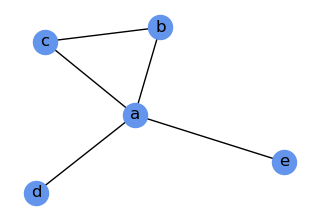

In [139]:
from matplotlib import pyplot as plt
plt.figure(figsize=(3,2)) 

elist = [tuple(pair) for pair in "ab ac bc ad ae".split()]
G22 = nx.Graph()
G22.add_edges_from(elist)
nx.draw_spring(G22,with_labels=True,node_color="cornflowerblue")

We want to compute the clustering coefficient for Alice (node a). Alice participates in exactly one "triangle" (abc);
that is, Alice has one pair of friends who know each other. On the other hand, there are 4 possible friendships in Alice's set: bc, bd, be, cd, ce,  and de.  Only the first of these is actually instantiated in the graph.  So node a's clustering coefficient is .167 (1/6).  This too can be put in probability terms.  

Choose any two friends of Alice's at random. What is the probability that they know each other?  Well, it's .166.

Let's see what networkx says:

In [146]:
cluster_dict_22

{'a': 0.16666666666666666, 'b': 1.0, 'c': 1.0, 'd': 0, 'e': 0}

In [144]:
cluster_dict_22 = nx.clustering(G22)
cluster_dict_22['a']

0.16666666666666666

Whew.

To write  this out as a formula let's define some notation:

$$
   \begin{array}[t]{llp{5in}}
  \text{N}_{j} &  & \text{the (set of) neighbors of node $j$}\\
   \mid \text{N}_{j} \mid &  & \text{the number of neighbors node $j$ has in the graph}\\
   \text{E}(\text{S}) &  & \text{the set of edges for some set of nodes S}\\
   \text{E}(\text{N}_{j}) & & \text{the set of edges among the neighbors of $j$}\\
   \mid \text{E}(\text{N}_{j})\mid & & \text{the number of edges among the neighbors of $j$}\\
   {k \choose 2} &  \frac{k(k-1)}{2} & \text{the number of possible pairs for a set of $k$ things} \\[.05in]
   {\mid \text{N}_{j} \mid \choose 2} &\frac{\mid \text{N}_{j} \mid(\mid \text{N}_{j} \mid-1)}{2} & \text{the number of possible edges connecting neighbors of $j$} \\[.05in]
   \end{array}
$$

Then CC(j), the clustering coffiecient of node $j$ is defined as follows:

$$
\text{CC}\,(\,j\,) = \frac{\mid \text{E}(\text{N}_{j})\mid}{\mid \text{N}_{j} \mid \choose 2}
$$

#### Questions about clustering coeffiecients

1.  What is the average clustering value for a complete graph?


> Look at the complete graph below and think about it before scrolling down to the answer below.

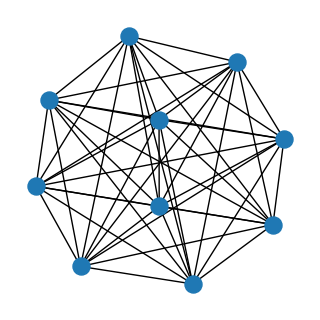

In [79]:
plt.figure(figsize=(3,3)) 
decad = nx.complete_graph(10)
nx.draw_spring(decad,node_size=150)

In [80]:
decad = nx.complete_graph(10)
ddc = get_dict_average(nx.clustering(decad))

print(f"{ddc=:.3f}")

ddc=1.000


2.  Consider the following Watts-Strogatz graph.  What is its average clustering value?

> Think about it before scrolling down to the answer.

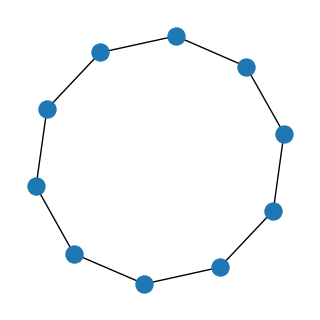

In [81]:
plt.figure(figsize=(3,3)) 

wsg = nx.watts_strogatz_graph(10, 2, 0,seed=47)
#print(nx.triangles(wsg2))
nx.draw_spring(wsg,node_size=150)

In [74]:
wsc = get_dict_average(nx.clustering(wsg))
#wsc = nx.average_clustering(wsg)

print(f"{wsc=:.3f}")

wsc=0.000


3.  Now consider the following Watts-Strogatz graph.  What is its average clustering value?

> Think about it before scrolling down to the answer.

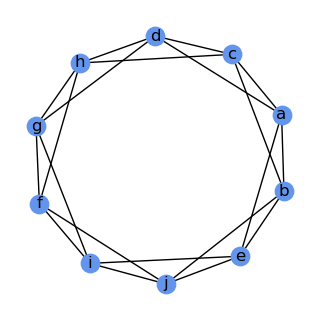

In [118]:
from matplotlib import pyplot as plt


plt.figure(figsize=(3,3)) 

# For expository purposes, Im choosing a particular ndoe labeling.
mapping = dict(list(zip(range(10),'abejifghdcklmnopqrstuvwxyz')))
wsg2 = nx.relabel_nodes(nx.watts_strogatz_graph(10, 4, 0,seed=47),mapping)
# And I want to settle on aparticular node layout.
pos = nx.spring_layout(wsg2,seed=24)
nx.draw(wsg2,pos=pos,node_size=175,with_labels=True,node_color="cornflowerblue")

In [147]:
wsd2

{'a': 0.5,
 'b': 0.5,
 'e': 0.5,
 'j': 0.5,
 'i': 0.5,
 'f': 0.5,
 'g': 0.5,
 'h': 0.5,
 'd': 0.5,
 'c': 0.5}

In [119]:
wsd2 = nx.clustering(wsg2)
wsd2['a']

0.5

In [76]:
wsc2 = nx.average_clustering(wsg2)

print(f"{wsc2=:.3f}")

wsc2=0.500


## The clustering coefficient of a random graph

`Networkx` provides a clustering function that takes a graph and sequence of nodes in that graph and returns a dictionary each of the given nodes with its clustering coefficient.  The average clustering coefficient of the graph is just the sum of the values of the coefficients for all the nodes divided by the number of nodes.

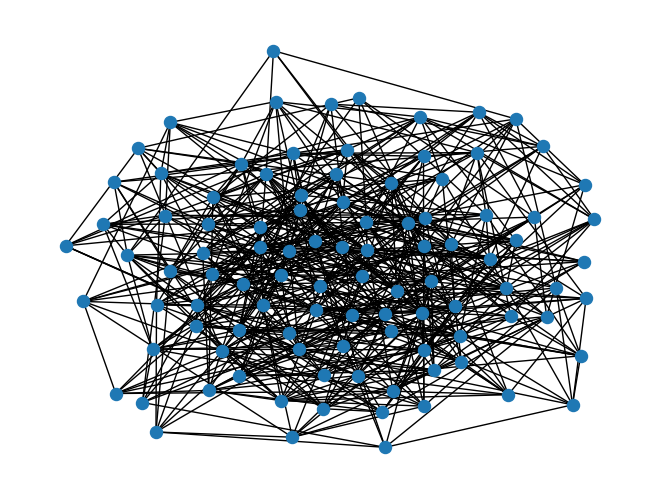

In [126]:
erg = nx.erdos_renyi_graph(100,0.11)
nx.draw_spring(erg,node_size=75)

By definition in the graph above a random node has .11 probability of being connected to any other
node.  There are 100 nodes. So the average degree of a node should be 11.

In [149]:
L = list(dict(erg.degree()).values())
sum(L)/len(L)

11.54

In [151]:
erg.number_of_edges()

577

**Connection probability** of a graph: If you pick a random pair of nodes, what is the probability that they will be connected?

Analytically, it's:

In [154]:
# (Number of actual edges)/(Number of edge pairs)
577/((100*99)/2)

0.11656565656565657

That's reassuring, because
that of course is close to what we told the random graph function when we created the graph `erg`:

```
erg = nx.erdos_renyi_graph(100,0.11)
```

In networkx edge (and in the graph literature) the function that computes this probablity is 
`nx.density()`:

In [155]:
nx.density(erg)

0.11656565656565657

What will the average clustering coefficient be?

In [157]:
G = nx.erdos_renyi_graph(100,0.11)
cl = nx.clustering(G,G.nodes())
print(f"Density: {nx.density(G):.3f} Avg clustering: {sum(cl.values())/len(cl):.3f}")

Density: 0.107 Avg clustering: 0.101


In [36]:
cl

{0: 0,
 1: 0.1,
 2: 0.18181818181818182,
 3: 0.0641025641025641,
 4: 0.10606060606060606,
 5: 0.21212121212121213,
 6: 0,
 7: 0.06060606060606061,
 8: 0.08333333333333333,
 9: 0.022222222222222223,
 10: 0.08333333333333333,
 11: 0.1388888888888889,
 12: 0.17777777777777778,
 13: 0,
 14: 0,
 15: 0.10714285714285714,
 16: 0.1111111111111111,
 17: 0.2,
 18: 0.09523809523809523,
 19: 0.10833333333333334,
 20: 0.25,
 21: 0.10256410256410256,
 22: 0.2,
 23: 0.022222222222222223,
 24: 0.14285714285714285,
 25: 0.10909090909090909,
 26: 0.10476190476190476,
 27: 0.14285714285714285,
 28: 0.1111111111111111,
 29: 0.05454545454545454,
 30: 0.13333333333333333,
 31: 0.06666666666666667,
 32: 0.10606060606060606,
 33: 0.09523809523809523,
 34: 0.13333333333333333,
 35: 0.13333333333333333,
 36: 0.18181818181818182,
 37: 0.09090909090909091,
 38: 0.16363636363636364,
 39: 0.047619047619047616,
 40: 0.06060606060606061,
 41: 0.07142857142857142,
 42: 0.10256410256410256,
 43: 0.16666666666666666,
 4

Try the same thing on a bigger graph:

In [159]:
G = nx.erdos_renyi_graph(500,0.11)
cl = nx.clustering(G,G.nodes())
#sum(cl.values())/len(cl)
print(f"Density: {nx.density(G):.4f} Avg clustering: {sum(cl.values())/len(cl):.4f}")

Density: 0.1098 Avg clustering: 0.1102


The next cell will take a while.  While it's computing away, you'll have the chance to think
about it. What do you think the clustering coefficient of the graph will be?  Approximately.

In [160]:
G = nx.erdos_renyi_graph(1000,0.11)
cl = nx.clustering(G,G.nodes())
print(f"Density: {nx.density(G):.4f} Avg clustering: {sum(cl.values())/len(cl):.4f}")

Density: 0.1094 Avg clustering: 0.1094


The two numbers are virtually identical once we have large enough graphs.  In a random graph all
connections are made independently of all others.  Average clustering coefficient measures the probability that two nodes will be connected given that they "share a friend."  In a random graph, the fact that nodes $i$ and $j$ are both
linked to node $k$ makes them neither nor less likely to be connected to each other.  

## Homework question

The value of the clustering coefficient is one of the properties that distinguishes random graphs from social networks.  In the next cell compute the clustering coefficent of the karate graph.  Is it higher or lower than that of the random graph? 

In [135]:
nx.average_clustering(kn)

0.5706384782076823

In [162]:
print(f"Density: {nx.density(kn):.2f} Avg clustering: {nx.average_clustering(kn):.2f}")

Density: 0.14 Avg clustering: 0.57


So the probability that two club members will be linked given that they share a friend is about 4 times the probability that two random club members will be linked.  That's a **high** degree of clustering.

 Is that what you expect given that social networks are small worlds?

## Florentine families

The next graph is a famous graph of Florentine families (Padgett and Ansell 1993).

>Padgett, John F., and Christopher K. Ansell. "Robust Action and the Rise of the Medici, 1400-1434." American journal of sociology (1993): 1259-1319.

A link represents marriage between members of the families.



In [28]:
ff = nx.florentine_families_graph()

To get the long gamily names to print legibly right we, put the
labels in "bbox"s (text boxes).  This puts little frames around each label with
customizable shape and padding, as well as colorable faces and boundaries.  

In [29]:
list(ff.neighbors('Medici'))

['Acciaiuoli', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati']

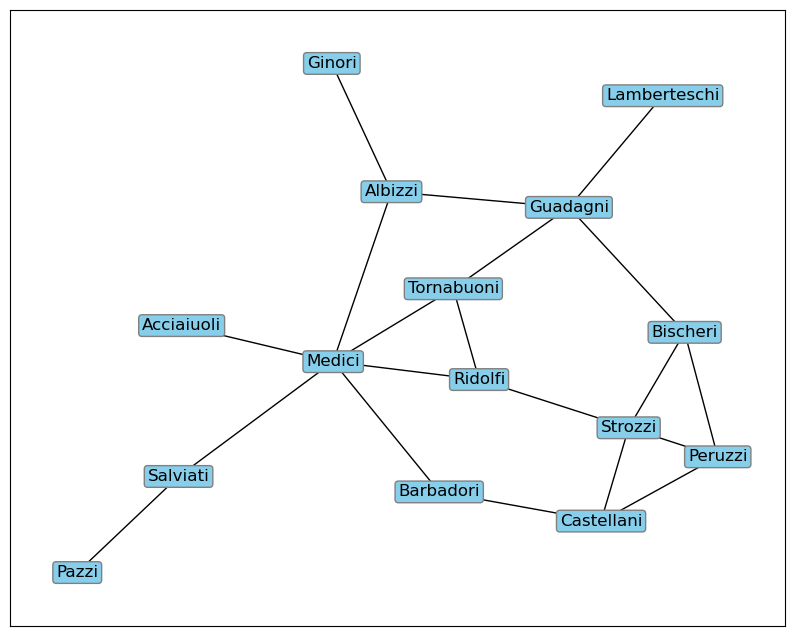

In [36]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8)) 
# Guarantee same layout on successive calls with fixed seed.
pos = nx.spring_layout(ff,seed=47)
nx.draw_networkx(ff,pos=pos, with_labels=True, node_shape = 's', node_color="none", 
                    bbox=dict(facecolor="skyblue", edgecolor='gray', boxstyle='round,pad=0.2'))

Tru computing the average CC of the Florentine Families graph.  How does it compare with that
of the karate graph (.57) and the random graph (.11) ?

In [37]:
ff = nx.florentine_families_graph()
print(f"Density: {nx.density(ff):.2f} Avg clustering: {nx.average_clustering(ff):.2f}")

Density: 0.19 Avg clustering: 0.16


Note that the average clustering is actually **less than** the edge density.  That is, two families both connected to a given edge $e$ are less likely to be connected to each other than two randomly chosen families.  So the Florentine Families Graph is **not** behaving like most of the social networks studied by Watts and Strogatz.  There is
not a lot of clique-ishness or clustering going on.  This may have something to do with
the kind of historical context being studied.  This is a situation in which power is being centralized.  The Medicis
have no particular interest in seeing families they have married into develop marriage alliances with
each other; likewise for other families.  Hence, generalizations about all social networks should
probably be made with suitable qualifications.

## Another drawing customization example

An alternative route for drawing the Florentine Families is to adjust 
the labels by hand in `matplotlib`.  To do this we introduce a function
`annotate_with_networkx_labels` which is intended as a replacement for
`nx.draw_networkx_labels`, which is the internal function
that draws labels. Paralleling that we also have
`nx.draw_netwoprkx_nodes`, and `nx.draw_netwoprkx_edges`,
which we do not replace here.  All three of these functions
require a separately computed layout which can be supplied
by any of a number of `networkx` layout functions,
differing in what layout algorithm they use (there are a ton!).
We'll use `pos=nx.spring_layout(G)` in all our examples.
Here `pos` is the layout to used by all the other drawing
functions.

In the plot below, we redraw the Florentine families graph with the node labels raised above the nodes.  Networkx does not seem to offer this capability, so we provide `annotate_with_networkx_labels`, which does.
Basically the function takes x- and y-offset values that determine the direction of the offset of the
node labels from the center of the node.  The nodes labels are added in matplotlib as annotations to  the plot.  This is all made possible because `networkx` draws all its graph layouts on `matplotlib` figures and axes.

Next execute the code in the next two cells to redraw the Florentine family graph, using the new function.

In [367]:
import networkx as nx
#import matplotlib.pylab as plt
import matplotlib.cbook as cb
import math
import math
from matplotlib import pyplot as plt
from matplotlib import rcParams
import cycler

# So far, only 'DejaVu Sans' works
rcParams['font.sans-serif'] = ['Lucida Grande', 'DejaVu Sans',
                               'Verdana']

#n = 4
#color = pyplot.cm.viridis(np.linspace(0, 1,n))
color = ["Cyan", "Gold", "Violet", "Ivory"]
#rcParams['axes.prop_cycle'] = cycler.cycler(color = color)
def annotate_with_networkx_labels(G, pos,
                                  labels=None,
                                  fontname = None,
                                  fontsize=12,
                                  font_color='k',
                                  font_weight='normal',
                                  alpha=1.0,
                                  ax=None,
                                  horizontalalignment = 'center',
                                  verticalalignment = 'center',
                                  xoff = 0.0,
                                  yoff = 0.0,
                                  offset_dict = None,
                                  **kwds):
    """
    Draw node labels on the graph G.  This functions as a standin for networx.draw_networkx_labels,
    which allows either uniform label offset (xoff,yoff) or node by node label offset (offset_dict).

    Parameters
    ----------
    G : graph
       A networkx graph

    pos : dictionary, optional
       A dictionary with nodes as keys and positions as values.
       If not specified a spring layout positioning will be computed.
       See networkx.layout for functions that compute node positions.

    font_size : int
       Font size for text labels (default=12)

    font_color : string
       Font color string (default='k' black)

    font_weight : string
       Font weight (default='normal')

    xoff: int ot float
        Horizontal offset in points of text from node
        
    yoff: int ot float
        Vertical offset in points of text from node
        
    alpha : float
       The text transparency (default=1.0)

    ax : Matplotlib Axes object, optional
       Draw the graph in the specified Matplotlib axes.
    """
    if ax is None:
        ax=plt.gca()
    if labels is None:
        labels=dict( (n,n) for n in G.nodes())

    # A variant for some of the text annotations.
    text_props_r = dict(fontname =fontname,
                        size=fontsize,
                        color= font_color,
                        weight = font_weight,
                        verticalalignment = verticalalignment,
                        horizontalalignment = horizontalalignment,
                        alpha = alpha,
                        # Express text coords in offsets from xy, unit is pt
                        textcoords='offset points')

    text_items={}  # there is no text collection so we'll fake one
    offset_dict0 = dict((n,(xoff,yoff)) for n in G)
    if offset_dict:
        offset_dict0.update(offset_dict)
    for n, label in labels.items():
        (x,y)=pos[n]
        label=str(label) # this will cause "1" and 1 to be labeled the same
        thisxoff,thisyoff = offset_dict0[n]
        t=ax.annotate(label,xy=(x, y),
                      xytext=(thisxoff,thisyoff),
                      #transform = ax.transData,
                      clip_on=True,
                      **text_props_r
                      )
        text_items[n]=t

    return text_items


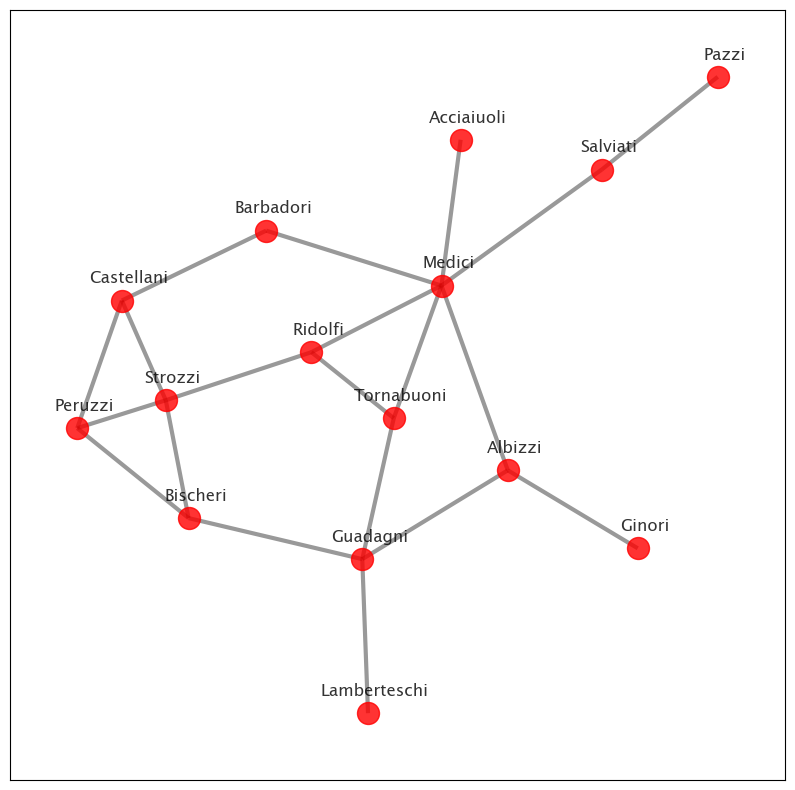

In [537]:
import matplotlib.pylab as plt

import networkx as nx
#from imp import reload
#reload(annotate_networkx)
G = nx.florentine_families_graph()
# Graphviz version only works if you have graphviz installed.
#pos=nx.graphviz_layout(G,prog='sfdp') 
pos=nx.spring_layout(G) 

# Make the figure bigger
plt.figure(figsize=(10,10))
# So no labeling.  We'll do it ourselves.
nx.draw_networkx_nodes(G,pos,
                       node_color='r',
                       node_size=250,
                       alpha=0.8)
# edges
nx.draw_networkx_edges(G,pos,width=3.0,alpha=0.4)

yoff = 16
# Raise labels so that the vertical center of the text is yoff above node
text = annotate_with_networkx_labels(G,pos,yoff=yoff, xoff= 5, alpha = .8,
                                     verticalalignment='center')
#plt.show()

## Political blogs example

This example is mostly an example of data cleanup with graphs
using real data from a larger network.
We first read in the Adamic/Glance political blogs data.  This is raw data and it presents a problem.  The hyperlinks
from website to another, are directional.

This makes the graph what is called a **directed graph**, and many of our analysis tools don't work on directed graphs.  So what we'll do is turn it into an undirected graph.  We then check for connectedness,
another property we often rely on, and if the graph is not connected, we'll work
omn the largest component that is.

In [12]:
import networkx as nx
import urllib.request
import os.path

def url_fetch_networkx_graph (url):
    with urllib.request.urlopen(url) as filehandle:
         G = nx.read_gml(filehandle)
    return G

github_networks_data = 'https://raw.githubusercontent.com/gawron/python-for-social-science/master/networks/'
pb_url = os.path.join(github_networks_data, 'polblogs.gml')

pb = url_fetch_networkx_graph (pb_url)

In [13]:
def get_biggest_component (UG):
    components = list(nx.connected_components(UG))
    components.sort(key=lambda x:len(x),reverse=True)
    return UG.subgraph(components[0])

pb_ug = pb.to_undirected()
big_component = get_biggest_component(pb_ug)
# IF YOU DO THIS, try graphviz directly on the dot file
# for a different looking layout: sfdp -Tpng -opolblogs_sfdp.png polblogs.dot
#nx.write_dot(big_component, 'polblogs.dot')
print('pb_ug: %d nodes  Largest component: %d nodes' % (len(pb_ug.nodes()), len(big_component.nodes())))

pb_ug: 1490 nodes  Largest component: 1222 nodes


The graph is from the real world.  It's not a surprise that it's not connected. 

The largest component is still plenty big!

Summing up: we read in a big graph (nearly 1500 nodes) and it was not completely connected.  Along with
other network analysis tools, the layout algorithms we want to demo below work only with undirected connected graphs. The `networkx` graph method `to_undirected` made sure we had an undirected graph, and
we ffound the largest connected component of that.

Note that it might also be useful to use the boolean keyword *relabel=True* to use the names given
the blog sites on the *label* attribute.  By default `networkx` throws those away and just
uses the *id* attribute as the node name.  For now we don't do this, since we will dispense with any labels in this graph, because of the extra visualization problems labels create.  We next run the  layout algorithm. 

One option that networkx provides is to contract out the drawing work to another node layout program `graphviz`.  You can try using a graphviz implementation of the force-spring layout algorithm (read the docs), but that will only work if you have graphviz installed.  Whether you use graphviz or not, this step will take a few minutes, so be patient.

In [23]:
import networkx as nx
#  Seed = 47 guarantees same layout on successive calls
pos = nx.spring_layout(big_component,seed=47)

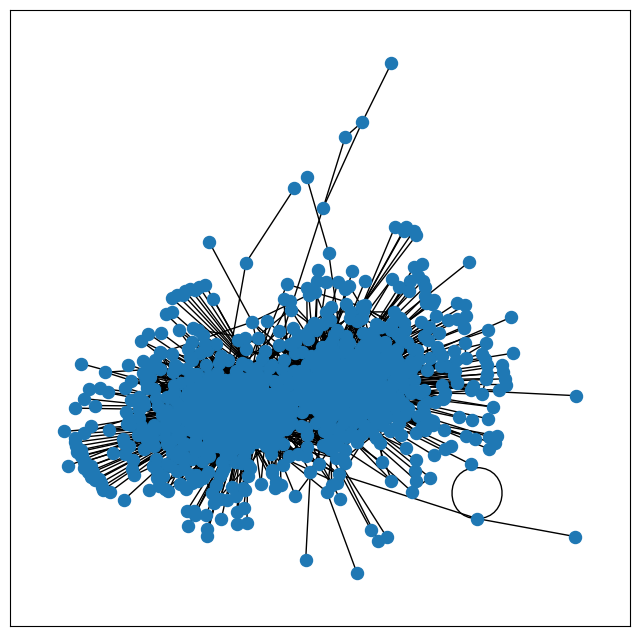

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
nx.draw_networkx_nodes(big_component,pos=pos,node_size=75)
nx.draw_networkx_edges(big_component,pos=pos)
plt.show()

This does not look quite as well separated as the graph we saw in lecture, produced by Gephi, and that may or may not due to the fact that the default number of iterations is not quite enough with this many nodes (the more iterations, the further apart the nodes fly).  But the liberal and conservative blogs are in fact already quite well separated, as we can see if we add in some coloring.  The classifications of the blog sites into liberal and conservative are stored in the class attribute `value`. So let's use that information to color. The value `1` stands for conservative (color that red) and the value `0` for liberal (color that blue).

In [502]:
blog_names = list(big_component.nodes)
print(blog_names[0])
big_component.nodes[blog_names[0]]['value']

100monkeystyping.com


0

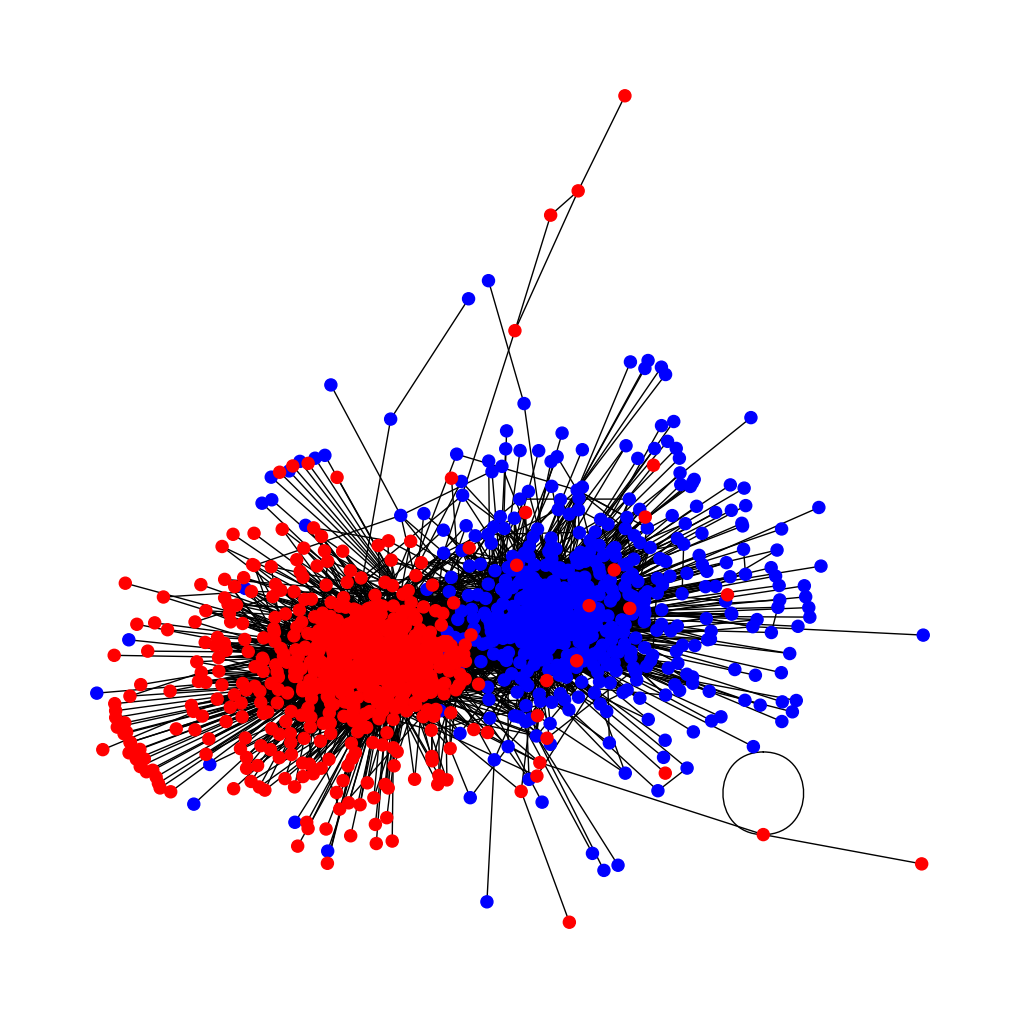

In [26]:
# Note that we're going to stick with the layout computed above (`pos`)
# because that took time to compute
color_seq = ('blue','red')
val_seq = (0,1)
cls_attr = 'value'
# dict that maps values onto colors
color_dict = dict(list(zip(val_seq, color_seq)))
# dict with each node attribute [all networkx graphs have this]
node_dict = big_component.nodes
# List of length n (# nodes) that assigns a color to each node
colorList = [color_dict[node_dict[n][cls_attr]] 
             for n in list(node_dict.keys())]
plt.figure(figsize=(10,10))
nx.draw(big_component,pos,node_size=75,node_color=colorList)
plt.show()
# An equivalent way of doing it.
#nx.draw_networkx_nodes(big_component,pos=pos,node_color=colorList)
#nx.draw_networkx_edges(big_component,pos=pos)

## Les Miserables

First lets read in the graph for the characters in Victor Hugo's novel `Les Miserables`,
and do some simple computations.

In [10]:
import networkx as nx
import urllib.request
import os.path

def url_fetch_networkx_graph (url):
    with urllib.request.urlopen(url) as filehandle:
         G = nx.read_gml(filehandle)
    return G

github_networks_data = 'https://raw.githubusercontent.com/gawron/python-for-social-science/master/networks/'
lm_url = os.path.join(github_networks_data, 'lesmiserables.gml')

lm = url_fetch_networkx_graph(lm_url)

## Centrality

In [11]:
M = nx.betweenness_centrality(lm)
il = list(M.items())
il.sort(key=lambda x:x[1],reverse=True)
top_chars = il[:10]

In [12]:
top_chars

[('Valjean', 0.5699890527836184),
 ('Myriel', 0.17684210526315788),
 ('Gavroche', 0.16511250242584766),
 ('Marius', 0.132032488621946),
 ('Fantine', 0.12964454098819422),
 ('Thenardier', 0.07490122123424225),
 ('Javert', 0.05433155966478436),
 ('MlleGillenormand', 0.047598927875243675),
 ('Enjolras', 0.0425533568221771),
 ('Tholomyes', 0.04062934817733579)]

## Simple graph attributes and analysis

The `relabel=True` says to use the value of the `label` attribute as the name of the node.  This means each node will have the same name as the character it represents.  If `relabel=False`, the `label` would still be an attribute of each node but each node would have an integer name.  

We have also found the `betweenness` centralities of all the nodes in the graph (line 3)
and created a sorted list of nodes, from highest centrality to lowest, and created a new list `top_chars` with the 10 most central  characters.

In [ ]:
il

The `top_chars` list is interesting and mostly intuitive, except that `Javert`, the policeman who relentlessly tracks `Valjean` and is certainly important, has rather a low betweenness centrality value.  You can look at the graph pictures below and speculate as to why this is.  Readers of the novel might also have some ideas.  It might also point to a problem with `betweeness centrality` as a measure of centrality.

In [64]:
top_chars

[('Valjean', 0.5699890527836184),
 ('Myriel', 0.17684210526315788),
 ('Gavroche', 0.16511250242584766),
 ('Marius', 0.132032488621946),
 ('Fantine', 0.12964454098819422),
 ('Thenardier', 0.07490122123424225),
 ('Javert', 0.05433155966478436),
 ('MlleGillenormand', 0.047598927875243675),
 ('Enjolras', 0.0425533568221771),
 ('Tholomyes', 0.04062934817733579)]

Ths list of characters.

In [17]:
lm.nodes()

NodeView(('Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup'))

Note that although it is no printed out above, the `NodeView` above also leads to the node attribute dictionary for each character.

In this particular graph, the attributes a node can have include its *id* (a unique identifier integer)  and its *label*, which is the character's name.  

The default way to identify a node would be by its `id` attribute, but we indicated we would use the `label` attribute (character names) when we specified `relabel=True`, when we called `readwrite_gml` to read in the graph.  So the keys in the node dictionary
will be `label` values.

In [18]:
lm_node_dict = lm.nodes
lm_node_dict['Javert']

{}

Just as nodes can have attributes, so can edges.  Edges might have attributes like strength (or weight) of connection, color, or type (in a graph whcih represents more than one type of connectedness).  The edge attribute dictionary is found in the `edge` attaribute. In our example that's `lm.edge`:

Note that edges can also have attributes. in our *Les Miserables* graph, there is a value attribute on each edge, which contains a weight reflecting how frequently the characters connected by the edge have appeared together in scenes.

In [19]:
lm['Javert']

AtlasView({'Valjean': {'value': 17}, 'Fantine': {'value': 5}, 'MmeThenardier': {'value': 1}, 'Thenardier': {'value': 5}, 'Cosette': {'value': 1}, 'Fauchelevent': {'value': 1}, 'Bamatabois': {'value': 1}, 'Simplice': {'value': 1}, 'Woman1': {'value': 1}, 'Woman2': {'value': 1}, 'Gavroche': {'value': 1}, 'Enjolras': {'value': 6}, 'Gueulemer': {'value': 1}, 'Babet': {'value': 2}, 'Claquesous': {'value': 1}, 'Montparnasse': {'value': 1}, 'Toussaint': {'value': 1}})

The attributes an edge have include the *value* attribute.  This is an integer that gives the number
of times two characters appear in a scene together.  Thus the higher the value the more intense
or "weighted" the connection between the two characters is.  We will experiment with
using this attribute in drawing graphs below.

We'll make one dictionary that has edges as keys (represented as pairs of strings) and their weights as values.  We'll use that to sort character relationships by strength:

In [70]:
(f,fdict) = list(lm.edges.items())[0]

In [71]:
f

('Myriel', 'Napoleon')

In [72]:
list(fdict.items())[0]
fdict

{'value': 1}

In [73]:
def sort_edges_by_weight (G,weight_att='value'):
    # frozenset used because ('Cosette', 'Valjean') is the same relationship as ('Valjean','Cosette'). 
    edge_dict = dict((frozenset(pair), fdict['value']) for (pair,fdict) in G.edges.items())
    return sorted(list(edge_dict.items()),key=lambda x: x[1], reverse=True)

edge_dict_il = sort_edges_by_weight(lm)
edge_dict_il[:5]

[(frozenset({'Cosette', 'Valjean'}), 31),
 (frozenset({'Cosette', 'Marius'}), 21),
 (frozenset({'Marius', 'Valjean'}), 19),
 (frozenset({'Javert', 'Valjean'}), 17),
 (frozenset({'Courfeyrac', 'Enjolras'}), 17)]

## Drawing issues

Next we try to draw the `Les Mis` graph, using the tools we used before.

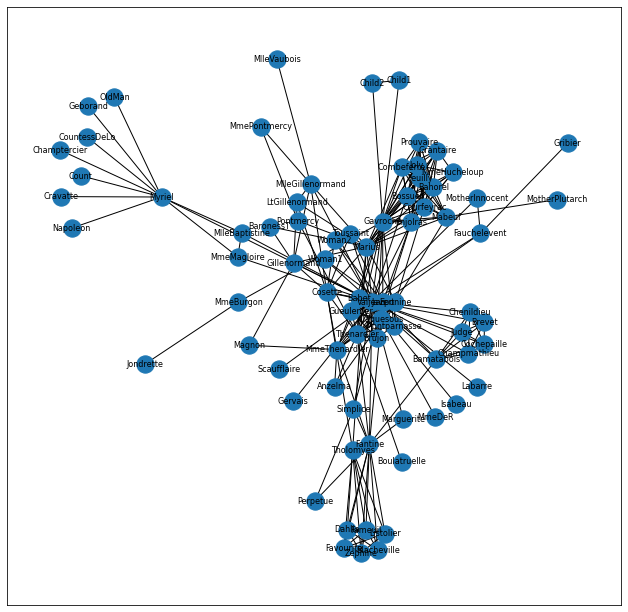

In [74]:
#pos = nx.spring_layout(lm,scale=1.0,iterations=200)
import math
from matplotlib import pyplot as plt
plt.figure(figsize=(11,11))
default_distance_between_nodes = 1.0/(math.sqrt(len(lm.nodes())))
#pos = nx.spring_layout(lm,scale=1.0,k=5*default_distance_between_nodes) # Try adjusting default distance between nodes
pos = nx.spring_layout(lm)
# Default node size=300, default font_size=12
# nx.draw_networkx(lm,pos, node_size=300, font_size=12)  
# node_size=800,font_size=8
# Try experimenting with node_shape 'D'
nx.draw_networkx(lm,pos, node_size=300, font_size=8)


This graph isnt very pretty to look at, primarily because of the bad placement of
the big labels.  We're going to try to draw something better.

We're only going to label subset of the nodes in the final graph (the top characters).  To do
that, we're going to create a dictionary of the nodes we're interested in.  It's going
to map nodes to the labels we want to use.  But the nodes are already represented by the labels
we're interested in, because we read them in with *relabel=True*.  So our new_labels dictionary
is just going to map a node to itself.

In [20]:
new_labels = dict((k,k) for (k,v) in top_chars)
num_nodes = len(lm.nodes())
import math
default_distance_between_nodes = 1.0/(math.sqrt(num_nodes))

In [76]:
new_labels

{'Enjolras': 'Enjolras',
 'Fantine': 'Fantine',
 'Gavroche': 'Gavroche',
 'Javert': 'Javert',
 'Marius': 'Marius',
 'MlleGillenormand': 'MlleGillenormand',
 'Myriel': 'Myriel',
 'Thenardier': 'Thenardier',
 'Tholomyes': 'Tholomyes',
 'Valjean': 'Valjean'}

# Using color cycles

When the number of colors is unknown in advance, as when running a community discovery algorithm, color cycles are helpful.  



In [2]:
from cycler import cycler
# a cycler Is a container containing dictionaries, all with the sam ekeys
# So we can simultaneously cycle through colors and line styles
color_cycle = cycler(color=['r', 'g', 'b'],style=['plain','dashed','dotted'])

Ncolors = len(color_cycle)
print('Num colors',Ncolors)
#  We picked 3 color/line style to cylce through.
for v in color_cycle:
  print(v)

Num colors 3
{'color': 'r', 'style': 'plain'}
{'color': 'g', 'style': 'dashed'}
{'color': 'b', 'style': 'dotted'}


In [3]:
from cycler import cycler
color_cycle = cycler(color=['r', 'g', 'b'])
Ncolors = len(color_cycle)
# Turn it into an infinite iterator
cc = color_cycle()
# Show the cycler cycling
for (i,c) in zip(range(4*Ncolors),cc):
     if i%Ncolors == 0:
       print('='*14)
     print(c)

{'color': 'r'}
{'color': 'g'}
{'color': 'b'}
{'color': 'r'}
{'color': 'g'}
{'color': 'b'}
{'color': 'r'}
{'color': 'g'}
{'color': 'b'}
{'color': 'r'}
{'color': 'g'}
{'color': 'b'}


Color cycles are often used for configuring matplotlib.

Num colors 20
{'color': (0.19215686274509805, 0.5098039215686274, 0.7411764705882353)}
{'color': (0.4196078431372549, 0.6823529411764706, 0.8392156862745098)}
{'color': (0.6196078431372549, 0.792156862745098, 0.8823529411764706)}


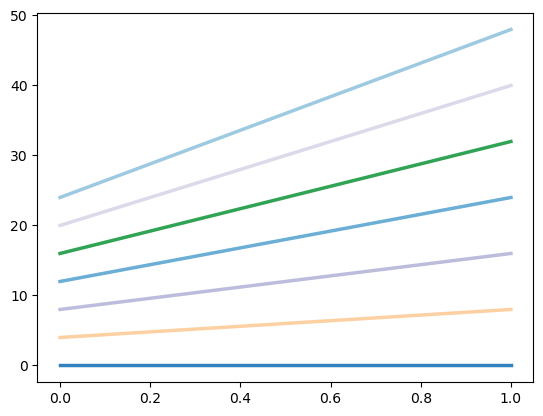

In [7]:
from matplotlib import pyplot as plt
Z = plt.cycler("color", plt.cm.tab20c.colors)
# When plotting cycle through this sequence
from matplotlib import rcParams
rcParams["axes.prop_cycle"] = Z
zz = Z()
# How many colors willI cycle through?
print('Num colors', len(Z))
for (i,c) in zip(range(3),zz):
     print(c)
fig, ax = plt.subplots()
# add 1 to the default
linewidth= 2.5
# Plot a line for every 4th color in cycle, go partway intio 2nd cycle
for i in range(25):
    if i%4 ==0:
      ax.plot([0,1], [i, 2*i],linewidth=linewidth)
    else:
      ax.plot([0],[0],linewidth)

#plt.show()

## Drawing and **annotation** code

In [573]:
import math

def new_draw_networkx(g,fileName=None, cls_attr='Community', ax = None,
                   prog = 'neato', pos = None, color_seq = None,
                   val_seq = None,with_labels=False,show=False, title=None,
                   use_graphviz=False,figsize=(8,8),seed=None):
    """
    Draws graph uses nx drawing tools, which call matplotlib (pyplot) as plt.

    Use color_seq to specify colors used to represent membership in set
    of nodes bearing attribute C{cls_attr}.  By default this is C{Community},
    but it can be any node attribute  represented in C{node_dict}.

    Pass in C{color_seq} to use a particular set of node colors.
    Optionally use val_seq in conjunction to map particular colors to particular values.

    Can optionally pass in a previously computed node layout as C{pos}.  Useful
    for comparing versions of graph colored according to different
    attributes.
    """
    ## Get the range of the attribute function.
    #node_dict = dict(g.nodes(data=True))
    node_dict = g.nodes
    val_set = set([node_dict[n][cls_attr] for n in g.nodes()])
    if color_seq is None:
        # Use integers and default color map
        color_seq = list(range(len(val_set)))
    ## Assign a color index to each member of val_set
    if val_seq is None:
        val_seq = val_set
    else:
        assert(val_set.issubset(val_seq)), 'Data vals include values not in val_seq'
    color_dict = dict((v,color_seq[i]) for (i,v) in enumerate(val_seq))
    colorList = [color_dict[node_dict[n][cls_attr]] for n in g.nodes()]
    if ax is None:
        plt.figure(figsize=figsize)
    if title:
        plt.title(title)
    if pos is None and use_graphviz:
        pos = nx.graphviz_layout(g,prog=prog)
        # The next two lines seem to be out of date, since they raise a "Requires pygraphviz" error
        #Gprime = nx.to_agraph(g)
        #Gprime.layout(prog=prog)
    elif pos is None:
        pos = nx.spring_layout(g,seed=seed)
    nx.draw(g,pos,ax = ax, node_color=colorList,with_labels=with_labels)
    if fileName is not None:
        plt.savefig(fileName)
    if show:
        plt.show()
    return color_dict, pos

def assign_colors(G, color_att, color_seq=None, val_seq=None, integers_ok=True):
    """
    Return a dictionary: Val |-> Col

    where Vals are the valueset for Graph C{G}'s node attribute C{color_att}.

    C{color_seq}  and C{val_seq} are aligned sequences of equal length
    specifying a particular assignment of colors to values.  If C{val_seq}
    is not supplied, the full range of value of C{color_att} is used,
    in arbitrary order.  If C{color_seq} is not supplied and C{integers_ok} is True, 
    an arbitrary sequence of integers will be used instead,
    with the assumption that some color map will be used to map from integers to colors.
    If C{integers_ok} is not True, a default color sequence is used.
    """
    val_set = set([G.nodes[n][color_att] for n in G.nodes()])
    if color_seq is None and integers_ok:
         # Use integers and default color map
         color_seq = list(range(len(val_set)))
    elif color_seq is None:
         color_seq = ('gold','cyan','dimgray','coral','burlywood','ivory','red', 'k')
    if val_seq is None:
      val_seq = val_set
    else:
       assert(val_set.issubset(val_seq)), 'Data vals include values not in val_seq'
    return dict(list(zip(val_seq, color_seq)))


def draw_networkx_but_for_labels (G,pos=None, seed=None,ax=None,figsize=(11,11),node_color='r',
                                 node_size=180,node_alpha=.9,edge_alpha=.3,edgewidth=.8,
                                 node_edgecolor="black"):
    if ax is None:
      (_fig, ax) = plt.subplots(1,1,figsize=figsize)
    if pos is None:
        pos = nx.spring_layout(G,seed=seed)
    ncoll = nx.draw_networkx_nodes(G, pos,
                                   node_color=node_color,
                                   node_size=node_size,
                                   alpha=node_alpha,ax=ax)
    ncoll.set_edgecolor(node_edgecolor)
    # edges
    nx.draw_networkx_edges(G,pos,width=edgewidth,alpha=edge_alpha,ax=ax)
    return pos

def draw_color_graph (G, color_att, pos=None, labels=None,
                      offset_dict=None, yoff=None, plt_file=None, ax=None, figsize=(11,11),
                      node_size=220, node_alpha=.9, node_color=None,
                      label_alpha=.8, edge_alpha = .3, edgewidth=.8,
                      color_seq=None, val_seq=None, with_labels=True, 
                      seed=47,fontsize=8,node_edgecolor="black"):
    """
    C{color_att} is the attribute that determines a node's color.  C{color_seq} and C{val_seq}
    are an aligned sequence of the values of color_att and colors or color specs (see assign_colors).
    Used when C{node_color} is not None.
    
    
    C{node_color} can be a be a color string spec; if it is, all nodes get that color. Otherwise
    it is a sequence of colors aligned with node sequence in G.nodes(). C{labels} is a similarly
    aligned sequence. C{offset_dict} or C{yoff} f for label customiuzation. See 
    annotate_with_networkx_labels.
    """
    node_dict  = G.nodes
    if node_color is None:
      color_dict = assign_colors(G, color_att, color_seq, val_seq)
      # List of length n (# nodes) that assigns a color to each node
      colorList = [color_dict[node_dict[n][color_att]] for n in G.nodes()]
    else:
      ColorList = node_color
    if ax is None:
      (_fig, ax) = plt.subplots(1,1,figsize=figsize)
    pos = draw_networkx_but_for_labels(G, pos, seed=seed,ax=ax, figsize=figsize,
                                     node_color=colorList, node_size=node_size,
                                     node_alpha=node_alpha, edge_alpha=edge_alpha,
                                     edgewidth=edgewidth,node_edgecolor=node_edgecolor)
    if with_labels and (offset_dict is not None or  yoff is not None):
        # label placement customization desired
        if yoff is None:
            yoff = 8.0
        annotate_with_networkx_labels(G,pos,labels=labels,yoff=yoff, alpha = label_alpha,
                                        verticalalignment='bottom', offset_dict = offset_dict,
                                        ax=ax, fontsize=fontsize) 
    elif with_labels:
        nx.draw_networkx_labels(G,pos,labels=labels, font_size = fontsize, font_color='black',
                                verticalalignment='center', horizontalalignment = 'center',ax=ax)
    if plt_file:
        plt.savefig(plt_file)
    return color_dict, pos

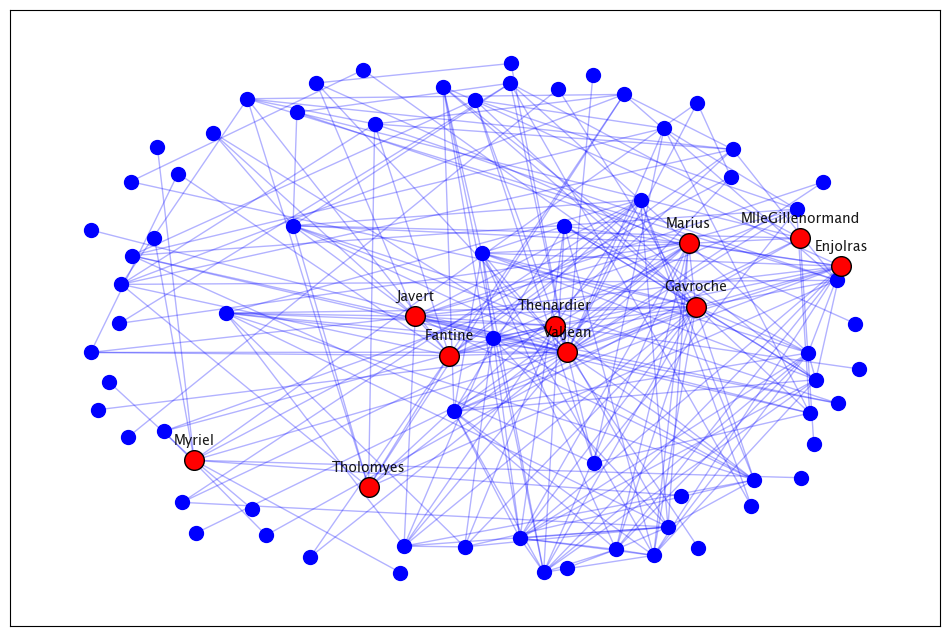

In [538]:

plt.figure(figsize=(12,8))
# Space out placement of nodes in layout. 16 * the default.
# Try changing this to the 8 * default: 8.0/(math.sqrt(len(lm.nodes()))
distance_between_nodes = 16.0/(math.sqrt(len(lm.nodes())))
seed=57
pos = nx.spring_layout(lm,scale=1.0,k= distance_between_nodes, seed=seed)
# Try increasing spring tension for characters who share more scenes 
# pos = nx.spring_layout(lm,scale=1.0,weight='value')

##############  Draw Edges ########################################################
nx.draw_networkx_edges(lm,pos, edge_color='blue',alpha=.3)  
##############  Draw Small Unlabeled Nodes ########################################################
nx.draw_networkx_nodes(lm,pos,node_color='blue',node_size=100) 
##############  Draw Large Labeled Nodes ########################################################
ncoll= nx.draw_networkx_nodes(lm,pos,new_labels,node_color='red',node_size=200)
## Add outline to large nodes only
ncoll.set_edgecolor('black')

# yoff: Raise labels so that text bottom is 9 pt above node bottom
text = annotate_with_networkx_labels(lm,pos,labels=new_labels,yoff=9, alpha = .9, 
                                     verticalalignment='bottom',fontsize=10)


First we draw the graph with no labels and small nodes.   Then
in line 16 we resize the top character nodes using `new_labels` and make them red;
`new_labels` is a dictionary containing labels for just the nodes we want to highlight.
Since the nodes are already identified by their correct labels, this is a dictionary
that maps every node name to itself for the top character nodes:

In [361]:
new_labels

{'Valjean': 'Valjean',
 'Myriel': 'Myriel',
 'Gavroche': 'Gavroche',
 'Marius': 'Marius',
 'Fantine': 'Fantine',
 'Thenardier': 'Thenardier',
 'Javert': 'Javert',
 'MlleGillenormand': 'MlleGillenormand',
 'Enjolras': 'Enjolras',
 'Tholomyes': 'Tholomyes'}

Then in line 21 we add labels to just those nodes using `new_labels` again.
This sequence of code is a very useful model.  When you want to
do something special to a subset of the nodes, draw the background graph first, choosing parameters to make the background nodes less visually salient.  Then tweak the graph to make  subset of the nodes salient
using some viusal foregrounding features such as node size or node color.

Here we used color and size as well as
labeling, using `networkx_draw_labels` for that subset of the nodes we wanted to foreground.

Note that in the above picture the 'Valjean' label overlaps the 'Thenardier' Node.  Let's fix that with
a small tweak.

Redraw adjusting the label for Jean Valean.

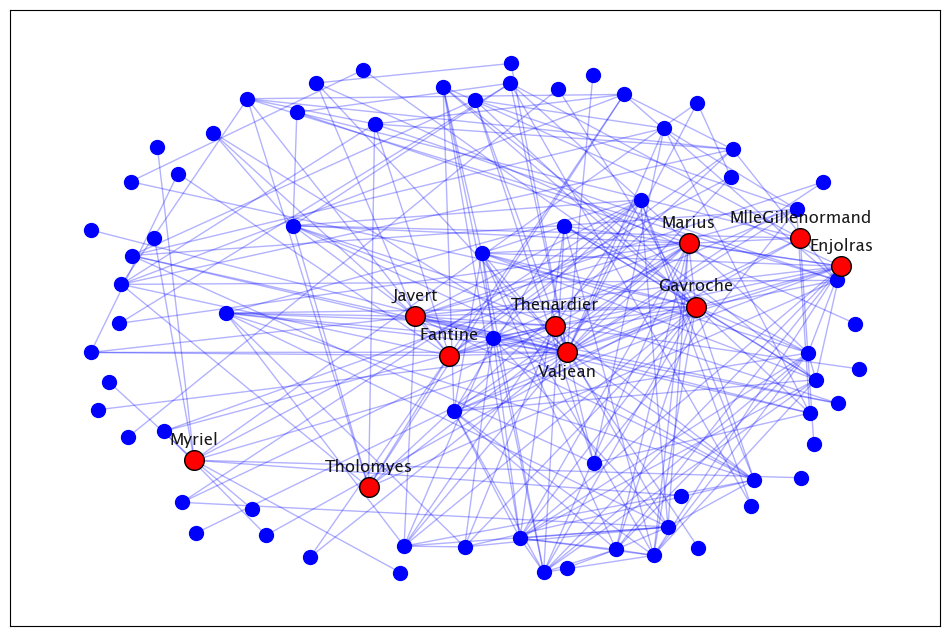

In [539]:
plt.figure(figsize=(12,8))
distance_between_nodes = 16.0/(math.sqrt(len(lm.nodes())))
seed=57
pos = nx.spring_layout(lm,scale=1.0,k= distance_between_nodes, seed=seed)
nx.draw_networkx_edges(lm,pos, edge_color='blue',alpha=.3)  
nx.draw_networkx_nodes(lm,pos,node_color='blue',node_size=100) 
ncoll= nx.draw_networkx_nodes(lm,pos,new_labels,node_color='red',node_size=200)
ncoll.set_edgecolor('black')

# offset_dict provides a placement tweak for yust one node label.  Al;l th erest are positioned
# using yoff.  Notice there is no xoff keyword. It isnt feasible to use a uniform offset in the  x direction
# for labels, since labels will generally be of different length
text = annotate_with_networkx_labels(lm,pos,labels=new_labels,yoff=9, alpha = .9, offset_dict=dict(Valjean=(0,-20)),
                                     font_size=9,verticalalignment='bottom')


==============================================================================================

## Hand labeling

The next version of the `Les Mis` graph is the one that takes the most work
but is really simple conceptually.  All labels are drawn, and their positioning with respect to the node is specified on a node-by-node basis.  Where in in our first example using `annotate_with_networkx_labels`,
we probvide a position tweak for one node lable using an `offset_dict` with
only one entry, here we provide an offset dict that prviodes a position for each node,
and that allows us to draw a useful graph that includes all node labels.
 
This will produce the best-looking result that loses no information, and for some purposes (important reference diagram in a paper) is worth the work.

In [ ]:
### import networkx as nx
from matplotlib import pyplot as plt
from random import seed


##################################################################################################
###
###   O f f s e t    D i c t i o n a r y
###
##################################################################################################

center_below = (0,-18)
center_above = (0,8)  # default
northwest = (-20, 0)
northwest_delta_x = (-25, 0)
northeast = (24, 2)
east = (19, -7)
# Offset units are pts (1/72in), so pretty small.
# Keys alphabetized to ease offset tweaking
lm_offset_dict = {
 'Anzelma': center_above,#(0,0 ),
 'Babet': east,
 'Bahorel': (-10,6),
 'Bamatabois': (14, 4),
 'BaronessT': (39, -4),
 'Blacheville': center_below,
 'Bossuet': (0,5),
 'Boulatruelle': center_below,
 'Brevet': (-20, -8),
 'Brujon': center_below,
 'Champmathieu': (-20, 6),
 'Champtercier': center_below,
 'Chenildieu': (24, 0),
 'Child1': center_above,
 'Child2': center_below,
 'Claquesous': (-23, -4),
 'Cochepaille': (25, -4),
 'Combeferre': northeast,
 'Cosette': center_above,
 'Count': (-24, 0),
 'CountessDeLo': (-1, 9),
 'Courfeyrac': (-14, -7),
 'Cravatte': (-30, -5),
 'Dahlia': center_above,
 'Enjolras': (-8,8),
 'Eponine': center_above,
 'Fameuil': (-26, 0),
 'Fauchelevent': center_below,
 'Favourite': (30, -7),
 'Feuilly': (18, 5),
 'Gavroche': center_below,
 'Geborand': (-38, -5),
 'Gervais': (3, 7),
 'Gillenormand': center_above,
 'Grantaire': center_below,
 'Gueulemer': center_above,
 'Isabeau': (-30, -4),
 'Javert': center_below,
 'Joly': (-15,0),
 'Judge': northwest,
  'Labarre': center_above,
 'Listolier': (-25, 0),
 'LtGillenormand': center_above,
 'Mabeuf': (-17,-8),
 'Marguerite': (-5, -17),
 'Marius': (15, 8),
 'MlleGillenormand': (-30, -4),
 'MmeDeR': (-36, -5),
 'MmeHucheloup': northeast,
 'MmeMagloire': (0, -18),
 'MmePontmercy': (49, -4),
 'MmeThenardier': (23, 0),
 'Montparnasse': center_below,
 'MotherInnocent': center_above,
 'Napoleon': center_above,
 'Pontmercy': (36, -4),
 'Prouvaire': (6,-18),
 'Scaufflaire': (-36, -4),
 'Simplice': (0, -18),
 'Toussaint': center_above,
 'Valjean': northwest_delta_x,
 'Woman1': center_above,#(0, 8),
 'Woman2': center_above,#(0, 8),
 'Zephine': (26, 0)
}

# May be usefil sub for offset_dict when attempting to read overlapping labels
#offset_dict22 = {k:(0,8) for (k,v) in offset_dict.values()}

##################################################################################################
###
###   L a b e l   D i c t i o n a r y
###
##################################################################################################

## To further help fit labels into the layout, we abbreviate some of them.
lm_labels = dict((n,n) for n in lm.nodes())
lm_labels['Anzelma'] = 'Anz'
lm_labels['Bamatabois'] = 'Bam'
lm_labels['Brevet'] = "Brev't"
lm_labels["Eponine"]  = "Epn"
lm_labels['Champmathieu'] = 'Champmt'
lm_labels['Chenildieu'] = 'Chdieu'
lm_labels['LtGillenormand'] = 'LtGille'
lm_labels['MlleGillenormand'] = 'MlleGille'
lm_labels['Gillenormand'] = 'Gille'
lm_labels['Woman1'] = 'W1'
lm_labels['Woman2'] = 'W2'
lm_labels["Mabeuf"] = "Mbf"
lm_labels['Montparnasse'] = 'MtP'
lm_labels['Cochepaille'] = "C'paille"
lm_labels['MmeThenardier'] = 'MmeT'
lm_labels['Thenardier'] = 'Then'
lm_labels['Toussaint'] = 'Tousst'
lm_labels['Cosette'] = "Cstte"
lm_labels['Claquesous'] = "Clqss"
lm_labels['MlleBaptistine'] = 'MmeB'
lm_labels['Gueulemer'] = 'Gm'
lm_labels['Babet'] = 'Babt'
lm_labels['MmeHucheloup'] = 'MmeH'
lm_labels['Enjolras'] = 'Enj'
lm_labels['Bossuet'] = 'Boss'
lm_labels['Courfeyrac'] = 'Cr'
lm_labels['Combeferre'] = 'Cmbfrr'
lm_labels['Prouvaire'] = 'Prvr'
lm_labels['Grantaire'] = 'Grtr'
lm_labels['CountessDeLo']  = 'CtssDeLo'

Having defined the laebling tweaks, we add a few extra parameters for nice drawing, and 
call the label annotatioon function with the offset dictionary.

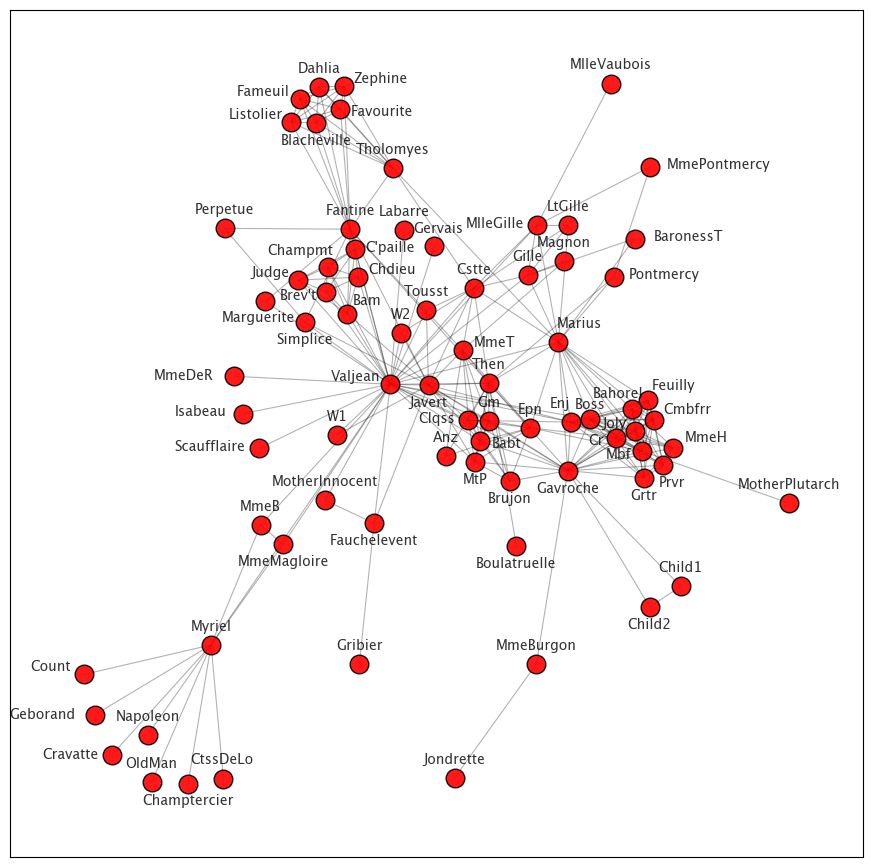

In [543]:
lm_seed=51
savefig=False
lm_node_color,lm_node_size = 'r',180
lm_node_alpha,lm_edge_alpha,lm_edgewidth = .9,.3,.8
lm_fontsize = 10
lm_pos = draw_networkx_but_for_labels (lm,seed=lm_seed,node_color=lm_node_color,
                                      node_size=lm_node_size,node_alpha=lm_node_alpha,
                                      edge_alpha=lm_edge_alpha,edgewidth=lm_edgewidth)
# Default text y offset from bottom of node = 8pt
# Default text alpha = .8
lm_label_alpha = .8
text = annotate_with_networkx_labels(lm, lm_pos, labels=lm_labels, yoff=8, alpha = lm_label_alpha,
                                     verticalalignment='bottom',
                                     offset_dict = lm_offset_dict,fontsize=lm_fontsize)

if savefig:
    fig_filename = 'LesMiserables.png'
    print(f"Saving image to {fig_filename}")
    plt.savefig(fig_filename,bbox_inches='tight')

##  Adding Communities I

#### Final incarnation of Les Mis Graph (Add community colors)

In the next example, we look for communities in the `Les Mis` graph using a community detection algorithm.  

To make that convenient we define `draw_color_graph`,  a function which produces graph drawings that color
nodes according to some node attribute. In general, this attribute can either be some class attribute in the data (gender, race, club) like the political orientation attribute `value` in the Polblogs example, 
or it can be assigned by a community detection program.
In our example, we'll use the node attribute "Community" assigned by a community
detection algorithm, `modularity_max`.

The `draw_color_graph` function we'll use for drawing combines many of the features we've used in this notebook.

1. We allow label positions to be fine-tuned with an offset dictionary 
2. We also pass in a previously used layout
3. We can pass in a value sequence and an aligned color sequence specifying the colors we want to assign 
to each value of the "Communiut" attribute. node by node positioing of the labels. 

If you look
in the code, you'll that `draw_color_graph` calls many functions we discussed above.

1. It calls the function `annotate_with_networkx_labels` for label positioning (used throughout this notebook).
2. It calls the function `assign_colors` used for coloring the polblog graph. This produces a color
   dictionary assigning a color to every node.
3. It calls the fumnction `draw_networkx_but_for_labels` used in the hand labeling example,
   which generally handles the non-labeling parts of graph drawing, with many tweakable parameters.

We provide this as an example to illustrate one way of pull together all the strategies we have used in this nodebook.

In the next cell we add information to the graph, assigning a community to each node using the
**Clauset-Newman-Moore greedy modularity maximization algorithm**.

Clauset, A., Newman, M. E., & Moore, C. 2004. “Finding community structure in very large networks.” Physical Review E 70(6).

For a contextualizing discussion and background on Community Detection, see *Networks: An Introduction*
by Mark Newman.  Especially

Newman, M. E. J. 2011.  *Networks: An Introduction*.  p. 224 Oxford University Press 2011.

Add the new attribute to the graph.

In [533]:
#import community
from networkx.algorithms.community import modularity_max
# Get a fresh copy because we want to assign a new attribute,
lm = url_fetch_networkx_graph(lm_url)

# Call community discovery algorithm and create a dictionary assigning a community to each node
partitions = modularity_max.greedy_modularity_communities(lm)
partition_dict = dict((n,i) for (i,p) in enumerate(partitions) for n in p)

# Export the community assigmnments to the graph by populating a new node attribute
# 'Community' containing the community of each node
for n in lm.nodes():
    lm.nodes[n]['Community'] = partition_dict[n]

The community detection algorithm finds 5 communities (natural structurally determined groupings)
in the graph:

In [534]:
print({lm.nodes[n]['Community'] for n in lm.nodes})

{0, 1, 2, 3, 4}


Next we create a color sequence and an aligned value sequence assigning a color to each of these
5 communities.  We'll pass those to `draw_color_graph`.

In [535]:

communities = sorted(list({lm.nodes[n]['Community'] for n in lm.nodes()}))
# A palette of 20 compatible colors to choose from
color_cyc = plt.cycler("color", plt.cm.tab20c.colors)
# Start a cycle
closed_color_cyc = color_cyc()
# color distance: We have 20 compatible colors to choose from and 5 communities.  Pick every 4th color
color_dist = 4 
# Color seq of same length as classes
color_seq = [c['color'] for (i,c) in zip(range(len(color_cyc)),closed_color_cyc) if i%color_dist == 0]
val_seq = communities

# Final condition to check
assert len(color_seq)  == len(val_seq)

 The parameter-settings used in the next cell are almost all
 settings defined for the hand labeling example, including the layout `lm_pos`.  
 The sole exceptions are the `color_seq` and `val_seq` derived  oin the previous
 cell.  The result is a graph identical in color and lyayout to what we did
 before, except for the color added by community discovery.

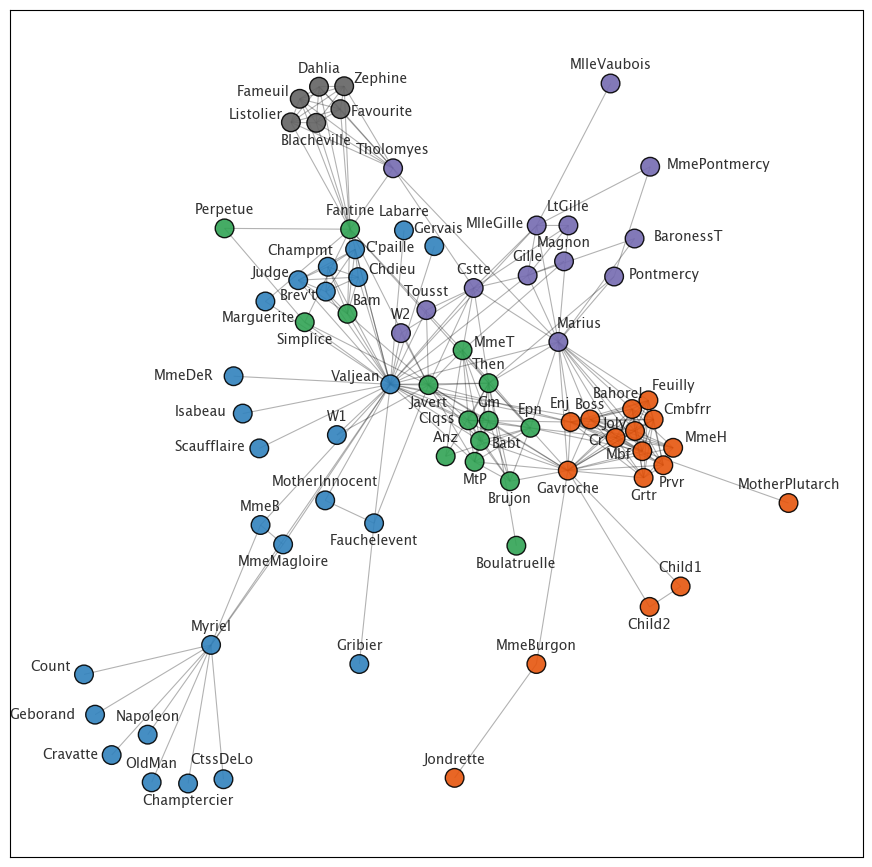

<Figure size 1100x1100 with 0 Axes>

In [544]:
(_,_) = draw_color_graph (lm, "Community", pos= lm_pos, 
                          color_seq=color_seq,val_seq=val_seq,
                          labels=lm_labels, offset_dict= lm_offset_dict,
                          node_size= lm_node_size, fontsize=lm_fontsize)

Notice how there is a lot of agreement between the communities the community detection
algorithm found and the way the layout algorithm groups nodes:   The nodes of the same
color are generally close together in the graph.

## Adding Communities II

In this section we continue looking at visualizations related to community discovery algorithms.

One of the most important uses of community discovery algorithms is to discover structure
implicit in the graph's connections, perhaps even indicative of functional distinctions
within the real world relationships the graph is modeling.

To evaluate a community discovery algorithm, then, it's often useful to 
find graphs for which there are known meaningful divisions and see how well
the algorithm does at discovering those divisions.  The Les Miserable graph
used in the previous example does not have this feature; readers of
the book may have intuitions about the various groups the characters fall into,
but there's no generally agreed on final answer.  

A graph that does have natural groupings, however, is Zachary's karate graph.
In this case we have the **club** attribute, which acording to Zachary,
captures the two factions the club eventually split into.  Zachary also tells us
that the split 

In [552]:
import networkx as nx
from networkx.algorithms.community import modularity_max
kn = nx.karate_club_graph()

We run the algorithm.  As before, the code adds a community attribute to each node, telling us which of the two community it's in.

In [553]:
# A list of lists of node.  Each list in partitions is an inferred community
#partitions = modularity_max.greedy_modularity_communities(kn,weight="weight")
partitions = modularity_max.greedy_modularity_communities(kn)
## node -> partition index (community) of node
partition_dict = dict((n,i) for (i,p) in enumerate(partitions) for n in p)

We add the node attributes we are going to use in drawing the pictures
below:

1.  'Cluster''n]:  The cluster the community discovery algorithm found  for node n (0,1, or 2).
2.  'Purity'[n]: The Purity Status of the cluster assigned to node n.  This is the club for node n
     if it agrees with the club for the cluster; otherwise it is "misclassified'.  The club
     for the cluster is simply the club the majority of its members belong to.

In [554]:
from collections import Counter
# We create a dictionary assigning a club label to every cluster
# the club label for a cluster is the club the plurality
# of its members belong to.
best_rep = {}
for (i,partition) in enumerate(partitions):
    # Counte the number of members for each club in partition
    ctr = Counter([kn.nodes[n]['club'] for n in partition])
    best_rep[i] = ctr.most_common(1)[0][0]

print(best_rep)

# Next we add a new attribute `Purity` recording whenever a node 
# does not belong to the best represented club of its cluster by assigning that node 
# the `purity` value 'misclassified'. Otherwise the `Purity` value is 
# the same as club value.
for n in kn.nodes():
    com,club = partition_dict[n], kn.nodes[n]['club']
    # n gets its cluster membership as an attribute
    kn.nodes[n]['Cluster'] = com
    # n gets its putiry status as an attribute
    kn.nodes[n]['Purity'] = club if club == best_rep[com] else 'misclassified'
 

{0: 'Officer', 1: 'Mr. Hi', 2: 'Mr. Hi'}


Summing up, there are  now three attributes assigned 
to every node of karate club grap, illustrated below by node 0:

In [524]:
kn.nodes()[0]

{'club': 'Mr. Hi', 'Cluster': 2, 'Purity': 'Mr. Hi'}

We see that node 0 represents a person belonging to the Mr. Hi faction ('club=Mr. Hi'),
and assigned to cluster 2 by the community discovery algorithm ('Cluster=2').   We also 
see that the majority of the members of cluster 2 are members of the Mr. Hi faction
'Purity=Mr. Hi').

On the other hand we have node 8:

In [525]:
kn.nodes()[8]

{'club': 'Mr. Hi', 'Cluster': 0, 'Purity': 'misclassified'}

Node 8 also represents a person belonging to the Mr. Hi faction ('club=Mr. Hi'),
but node 8 was assigned to cluster 0 ('Cluster=0'), and since
a majority of the members of cluster 0 belong to the Officer faction,
node 8 receives the 'Purity value `'misclassified'`

Below we draw a picture to visualize the performance of the community
detection algorithm.

In [555]:
from collections import Counter
from matplotlib import pyplot as plt

# A sane choice of 20 colors. 
classes = sorted(list({kn.nodes[n]['Purity'] for n in kn.nodes()}))
communities = sorted(list({kn.nodes[n]['Cluster'] for n in kn.nodes()}))
print(f"{len(set(communities))} Communities found")
color_cyc = plt.cycler("color", plt.cm.tab20c.colors)
# Start a cycle
closed_color_cyc = color_cyc()
#color_seq = ['Cyan', 'Gold','Ivory']
# color distance: Pick colors that arent too far apart
color_dist = 3
# Color seq for default club and club graphs
color_seq = [c['color'] for (i,c) in zip(range(len(color_cyc)),closed_color_cyc) if i%color_dist == 0]
# Color seq for clusters (communities)
color_seq2 = [c['color'] for (i,c) in zip(range(len(color_cyc)),closed_color_cyc) if i%color_dist == 2]

3 Communities found


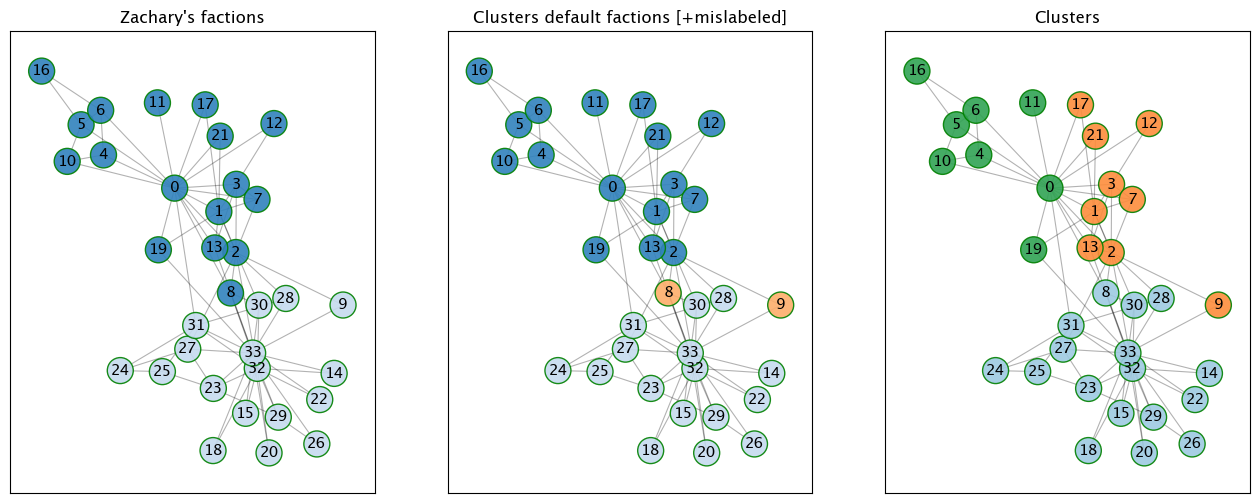

<Figure size 1100x1100 with 0 Axes>

<Figure size 1100x1100 with 0 Axes>

<Figure size 1100x1100 with 0 Axes>

In [556]:
################# Plotting Code ###########################
# ASk for  three sidebyside subplots, _f is the figure, which we wont use
# Ask for (16,6): much more width than height
_f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(16,6))
# filenames to save images in if we're saving images
fn1,fn2 = None, None
#fn1,fn2 = "karate_club.png","karate_club_purity.png"
# Layout the graph, keep random state to enable saving nice layout
kn_seed=48
kn_fontsize,kn_nodesize,kn_node_edgecolor =11,350,'green'
kpos = nx.spring_layout(kn,seed=kn_seed)
kclub_color_dict, _kpos =  draw_color_graph (kn, "club", pos= kpos, plt_file=fn1,
                                            ax=ax1, color_seq= color_seq, node_size=kn_nodesize,
                                            val_seq=classes,fontsize=kn_fontsize,
                                            node_edgecolor=kn_node_edgecolor)
title1 = ax1.set_title("Zachary's factions")
#cls_attr = 'Purity', 
kclub_color_dict2, _kpos2 =  draw_color_graph (kn, "Purity", pos= kpos, plt_file=fn2,
                                               ax=ax2, color_seq= color_seq, node_size=kn_nodesize,
                                               val_seq=classes,fontsize=kn_fontsize,
                                               node_edgecolor=kn_node_edgecolor)
title2 = ax2.set_title("Clusters default factions [+mislabeled]")
#cls_attr = 'Purity', 
kclub_color_dict2, _kpos2 =  draw_color_graph (kn, "Cluster", pos= kpos, 
                                               ax=ax3, color_seq= color_seq2,node_size=kn_nodesize,
                                               val_seq=communities,fontsize=kn_fontsize,
                                               node_edgecolor=kn_node_edgecolor)
title3 = ax3.set_title("Clusters")

The graph on the left shows the ground truth communities, Zachary's factions.  We'll name the factions after their central nodes, the 0-faction and the 33-faction.  The alignment with the clusters found by the community discovery algorithm is shown in the middle. The nodes in each cluster are colored in accordance with their **best-represented faction**, except that a third color is used for those nodes that have been misclassified by the community discovery algorithm.

We see that nodes 8 and 9 have been 'misclassified'.  They are also transitional nodes, each with 2 friendships split between the two factions.  Arguably it is very hard to predict from the link structure alone where they will end up. 
It also makes sense that such individuals might exist.  In any community fracture, there may be individuals with strong ties on both sides of the fracture; those individuals may face a difficult choice when the fracture occurs.
This is a special case of a very general problem with community discovery, and with clustering algorithms in general.  Whatever grouping properties in the real world we are trying to predict with our algorithm, the discriminating features in the dat, in this case the link structure of the graph, may not be sufficient to
predict the groups in the real world.

The graph on the right shows the 3 clusters found by the community discovery algorithm.  We see that the 0-faction has been split into two clusters we'll call 0a (green) and 0b (orange), and the 33-faction has been recovered almost perfectly. Node 8 has been grouped with the 33-cluster and should be in one of the 0 clusters,  Node 9 has been been grouped with 0b and should be in 33.

#### Purity

One might complain that there are 3 clusters but there should be 2, but in fact the data Zachary gives us doesn't
say that. She tells us there is a split into 2 factions but
we don't know if one of those factions can be further divided on similar grounds.  This is a general problem with ground truth communities, especially in social networks.
One way to deal with this is to choose an evaluation metric
that doesn't pay attention to whether the number of clusters
found by the community discovery algorithm agrees with the
number of ground truth communities.  Rather we assign 
each cluster a **best-represented community**,  the ground truth community of the plurality of its cluster members.
The **purity** of a cluster is the proportion of its members belonging to that best-represented community. The total purity of all clusters is the proportion of nodes whose ground truth community agrees with the best- represented community of their cluster.  The worst possible purity score is .5 and the best possible purity score is 1.0. Note that it is possible to get a perfect purity score in the situation we see above, when the algorithm finds 3 clusters for 2 ground truth communities.

Based on the picture above, we see that the karate club clustering isn't perfectly pure; in fact, 32 of the 34 club members belong to ground truth communities that agree with
the best-represented community of their cluster, that is, the total purity is .941, which is still pretty good.

A criticism that is sometimes made of purity as an evaluation measure is that it doesn't penalize a partition for having a lot of partitions with a small number
of members.  In fact, one can guarantee a perfect purity
score by having all the partitions have exactly one member. There are other metrics
that try to address this concern while trying to preserve some of
the intuitions of purity, but that leads us down a fairly deep rabbit hole.
For more on the issues and a look at some of the implemented solutions,
see [the scikit learn docs on clustering metrics.](https://www.tutorialspoint.com/scikit_learn/scikit_learn_clustering_performance_evaluation.htm)

The next cell provides some code for computing purity.


In [557]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred,verbose=False):
    # compute contingency matrix (also called confusion matrix)
    CM = metrics.cluster.contingency_matrix(y_true, y_pred)
    if verbose:
        print(CM)
    # np.amax(... axis=0) returns the max in each column
    # i.e. the number of members in each cluster belonging
    # to the best represented community.
    return np.sum(np.amax(CM, axis=0)) / np.sum(CM) 

y_pred = [kn.nodes[n]['Cluster'] for n in kn.nodes()]
y_true = [kn.nodes[n]['club'] for n in kn.nodes()]

print(f'32/34: {32/34:.3f} Purity score: {purity_score(y_true, y_pred):.3f}')

32/34: 0.941 Purity score: 0.941


The contingency matrix `CM` being used to compute purity is
a nice thing to eyeball.  If there are `m` ground truth communities and `n` clusters, `CM` has shape `m x n` and `CM[i,j]` is the number of members of community `i` belonging to cluster `j`.

In our case we have 2 ground truth communities, both with
17 members, split quite unevenly among 3 clusters. The columns tell us how each cluster is split up among the two ground truth communities.

In [239]:
CM = metrics.cluster.contingency_matrix(y_true, y_pred)
CM

array([[ 1,  8,  8],
       [16,  1,  0]])

#### A small improvement

But hold on! There's a piece of information we forgot to use: the **weights** on the edges.
These come directly from Zachary's paper and reflect the intensity of each of the
relationships represented by an edge.

The community discovery algorithm can be told to pay attention to a numerical valued attribute
which tells it how much importance to give each link. We merely need to tell it the name of the attribute
the edge importance is stored in.

In our case that is:

In [587]:
kn[8][0]

{'weight': 2}

Let's redo everything done above that
depends on the algorithm's choices, with the
one small change that we tell it to use the "weight" attribute to measure
the importance of an edge. Then we'll redraw using the same layout.

3 Communities found


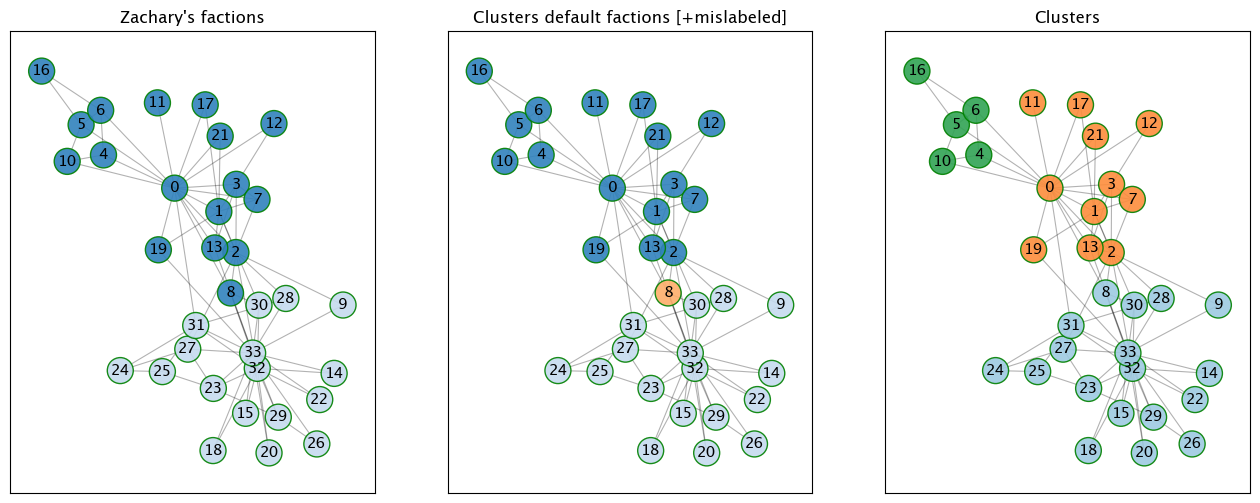

In [584]:
partitions = modularity_max.greedy_modularity_communities(kn,weight="weight")
partition_dict = dict((n,i) for (i,p) in enumerate(partitions) for n in p)

best_rep = {}
for (i,partition) in enumerate(partitions):
    ctr = Counter([kn.nodes[n]['club'] for n in partition])
    best_rep[i] = ctr.most_common(1)[0][0]

for n in kn.nodes():
    com,club = partition_dict[n], kn.nodes[n]['club']
    # n gets its cluster membership as an attribute
    kn.nodes[n]['Cluster'] = com
    # n gets its putiry status as an attribute
    kn.nodes[n]['Purity'] = club if club == best_rep[com] else 'misclassified'

classes = sorted(list({kn.nodes[n]['Purity'] for n in kn.nodes()}))
communities = sorted(list({kn.nodes[n]['Cluster'] for n in kn.nodes()}))
print(f"{len(set(communities))} Communities found")

################# Plotting Code ###########################
# ASk for  three sidebyside subplots, _f is the figure, which we wont use
# Ask for (16,6): much more width than height
_f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(16,6))
kclub_color_dict, _kpos =  draw_color_graph (kn, "club", pos= kpos, plt_file=fn1,
                                            ax=ax1, color_seq= color_seq, node_size=kn_nodesize,
                                            val_seq=classes,fontsize=kn_fontsize,
                                            node_edgecolor=kn_node_edgecolor)
title1 = ax1.set_title("Zachary's factions")
kclub_color_dict2, _kpos2 =  draw_color_graph (kn, "Purity", pos= kpos, plt_file=fn2,
                                               ax=ax2, color_seq= color_seq, node_size=kn_nodesize,
                                               val_seq=classes,fontsize=kn_fontsize,
                                               node_edgecolor=kn_node_edgecolor)
title2 = ax2.set_title("Clusters default factions [+mislabeled]")
kclub_color_dict2, _kpos2 =  draw_color_graph (kn, "Cluster", pos= kpos, 
                                               ax=ax3, color_seq= color_seq2,node_size=kn_nodesize,
                                               val_seq=communities,fontsize=kn_fontsize,
                                               node_edgecolor=kn_node_edgecolor)
title3 = ax3.set_title("Clusters")

Performance improved!  Now only one node, node 8, is misclassified!

As might be expected, our purity score improves too:

In [577]:
y_pred = [kn.nodes[n]['Cluster'] for n in kn.nodes()]
y_true = [kn.nodes[n]['club'] for n in kn.nodes()]

print(f'Old Purity Score: {32/34:.3f} New Purity score: {purity_score(y_true, y_pred):.3f}')

Old Purity Score: 0.941 New Purity score: 0.971


And that is because we have two perfectly pure clusters:

In [578]:
CM = metrics.cluster.contingency_matrix(y_true, y_pred)
CM

array([[ 1, 11,  5],
       [17,  0,  0]])

## Coloring paths and graph isomorphism

Exexuting the code below builds a random graph. Then it colors the shortest path between
two nodes.  Read the comments carefully.  If you don't like the graph you're getting or the picture you're getting, try just re-executing the cell.  The results will be different because each time you execute
`nx.erdos_renyi_graph` you get a different random graph matching the specs you passed in
as arguments.  So if it says:

```
G = nx.erdos_renyi_graph(8,0.4)
```

You get a a graph with 8 nodes with a probability of .4 of having an adge between
any two randomly selected nodes.

To stick with a graph you like, you might also remove the comment `character` `#` from the `random.seed` line
and try different integer values for the argument (1,9 ,7).  Once you get a graph
you like stick with that seed value.  After that, 
you will get the same graph each time you execute the cell, although the details of the layout might differ
each time you execute it.

[0, 35, 3]


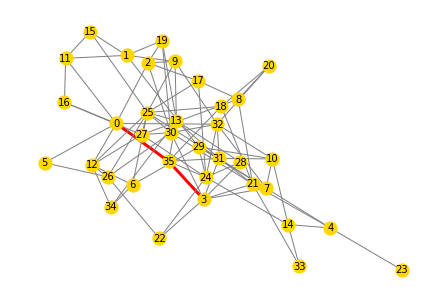

In [69]:
import numpy.random
import networkx as nx
# To stick with one random graph.
numpy.random.seed(5)
# To go back to changing randomly each time
# numpy.random.seed()
N,prob = 36,.15
G = nx.erdos_renyi_graph(N,prob)
# Find the shortest path from node 0 to node 3
p = nx.shortest_path(G,0,3)
print(p)
# Color all edges black for contrast with what's coming
for e in G.edges():
    G[e[0]][e[1]]['color'] = 'gray'
    G[e[0]][e[1]]['weight'] = 1
# color edges in the shortest path from 0 to 3 red
# p is a list of the nodes in the path.
# We're going to color each edge consisting of node in p
# and the next node in p blue, but we want to stop one
# node short of the end, because the last node in the
# path has no next node.  So we iterate through the
# list up to but not including the last member by `range` 
for i in range(len(p)-1):
    G[p[i]][p[i+1]]['color'] = 'red'
    G[p[i]][p[i+1]]['weight'] = 3
# Store in a list to use for drawing
#edge_color_list = [ G[e[0]][e[1]]['color'] for e in G.edges() ]
#  We pass nx.drawa list of colors exactly as long as the list of edges,
#  with the colors in exactly the order we want.  That is
# edge_color_list[i] has the color we want to assign to G.edges()[i].
edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]
nx.draw(G,node_color = 'gold', node_size= 175, font_size= 10,
               edge_color = colors, width= weights, with_labels = True)
#plt.show()

Set the random seed in the next cell to what it was in the previous cell and execute it.
Note that although the length of the shortest paths between 0 and 3 varies when
we look at all random graphs of size N with edge probability p, it does not vary now.  Study the resulting graph to
make sure it is the same as it was in the previous cell, differing only in layout and edge
coloring.

Point:  What makes two graphs identical is that they have the same nodes and each
node has the same neighbors.  Any given graph has an infinite number of colorings and layouts
but it's still the same graph.

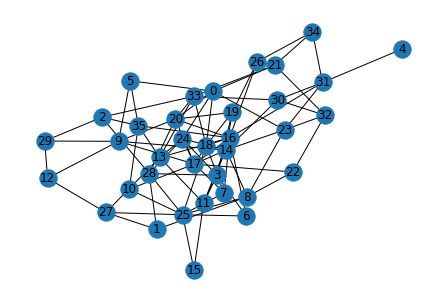

In [70]:
numpy.random.seed(5)
# To go back to 
#random.seed()
G = nx.erdos_renyi_graph(N,prob)
nx.draw(G, with_labels = True)

A more mathematical issue is that two graphs can be **isomorphic**.  They might have exactly the same structure
but have different names for the nodes.  To start with, note that `G.nodes()` produces a list of the nodes in ascending order.

In [ ]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35))

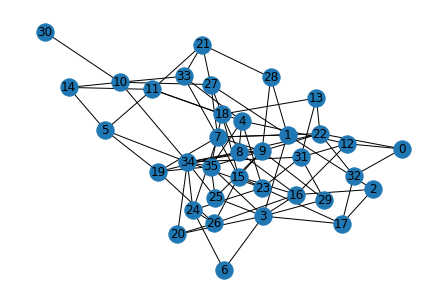

In [72]:
r = numpy.random.permutation(G.nodes())
new_graph = nx.Graph()
# Build a graph modeled on G, renaming the edges according to `r`.
for (s,e) in G.edges():
    new_graph.add_edge(r[s],r[e])
nx.draw(new_graph, with_labels=True)

The graph drawn above is isomorphic to the one we started with.  It has the same number of nodes of degree 4, degree 3, degree 2, etc.  Moreover, there is a particular relabeling of the first graph that produced the second.  We called
that relabeling `r` and write `r[i]` for the new label assigned to node `i`.  Then it will be true that

```
set(new_graph.neighbors(r[i])) == set([r[j] for j in G.neighbors(i)])
```

You should look at what kind of Python object `r` is and think about how it works as a relabeling.

In [ ]:
set(new_graph.neighbors(r[i])) == set([r[j] for j in G.neighbors(i)])

True

Note that another way to draw the same new graph is to draw `G` using `r` to give each node a new label, which is what is done below.

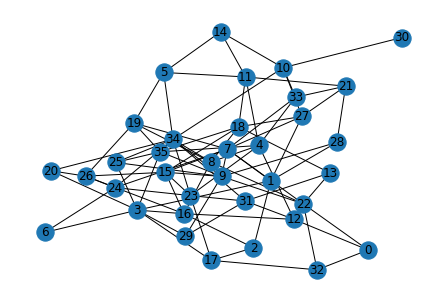

In [73]:
new_labels = dict(list(zip(G.nodes(),r)))
nx.draw(G, labels=new_labels)